# Importing libraries and directories 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from PIL import Image
from keras.preprocessing import image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

import pathlib

root_dir = 'C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions'

train_dir = root_dir + '/train/'
test_dir = root_dir + '/test/'

# 5 emotions for this project

In [2]:
labels = os.listdir(train_dir)
labels

['angry', 'fear', 'happy', 'sad', 'surprised']

In [3]:
#counting the images in each dataset

file_count = len(list(pathlib.Path(root_dir).glob('*/*/*.png')))
print('Total image count:', file_count)

file_count = len(list(pathlib.Path(train_dir).glob('*/*.png')))
print('Total training images:', file_count)

file_count = len(list(pathlib.Path(test_dir).glob('*/*.png')))
print('Total testing images:', file_count)

Total image count: 29142
Total training images: 23308
Total testing images: 5834


# checkout my images

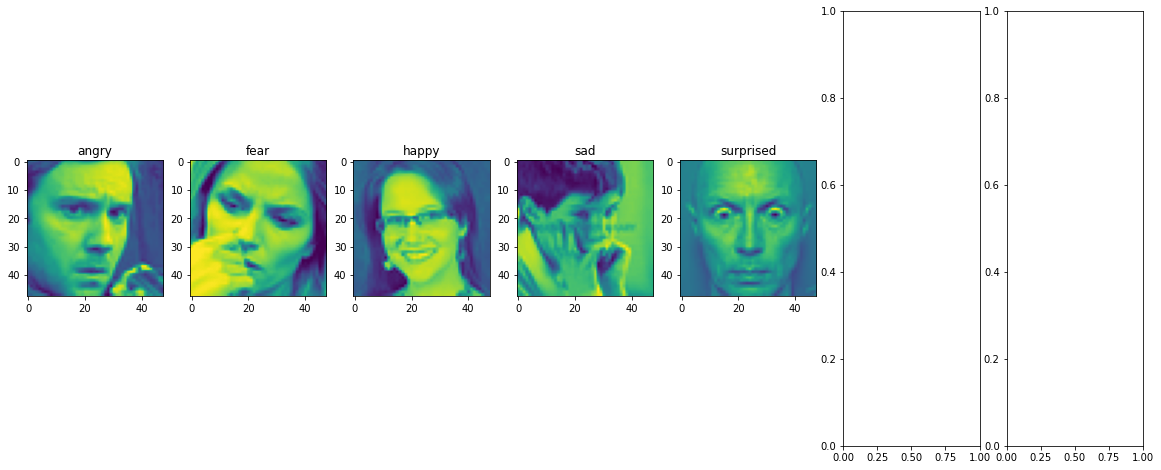

In [143]:
fig, axes = plt.subplots(1, 7, figsize=(20,8))

for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

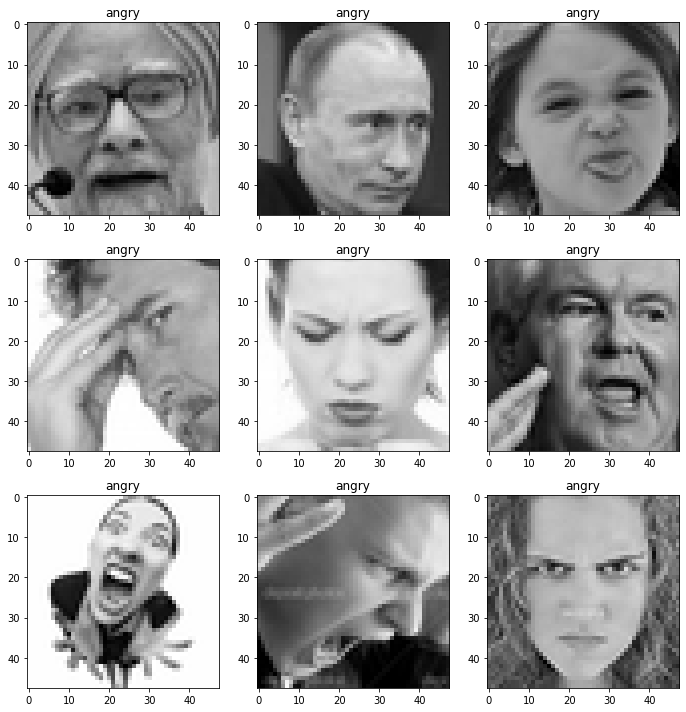

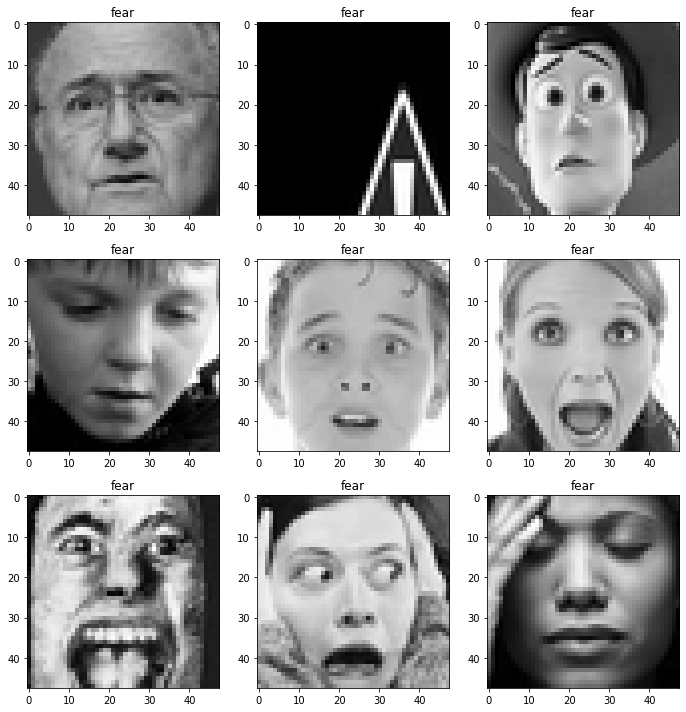

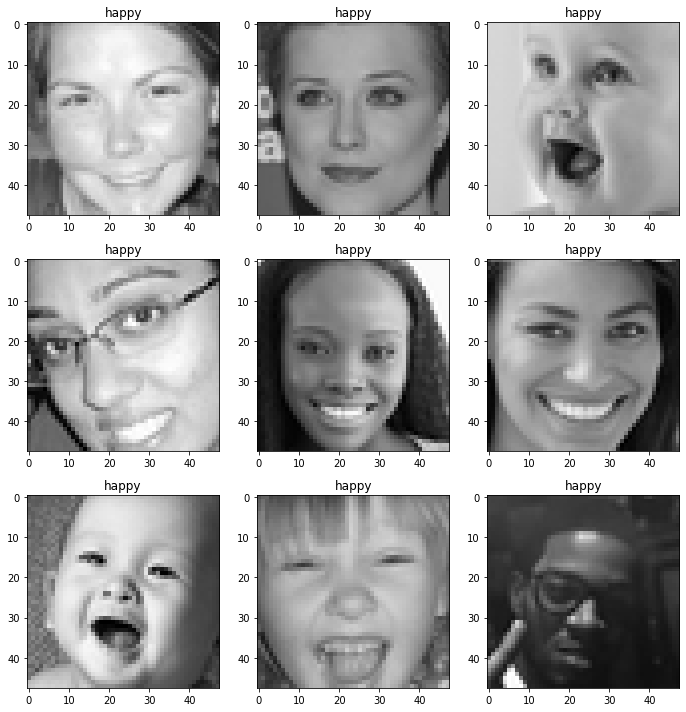

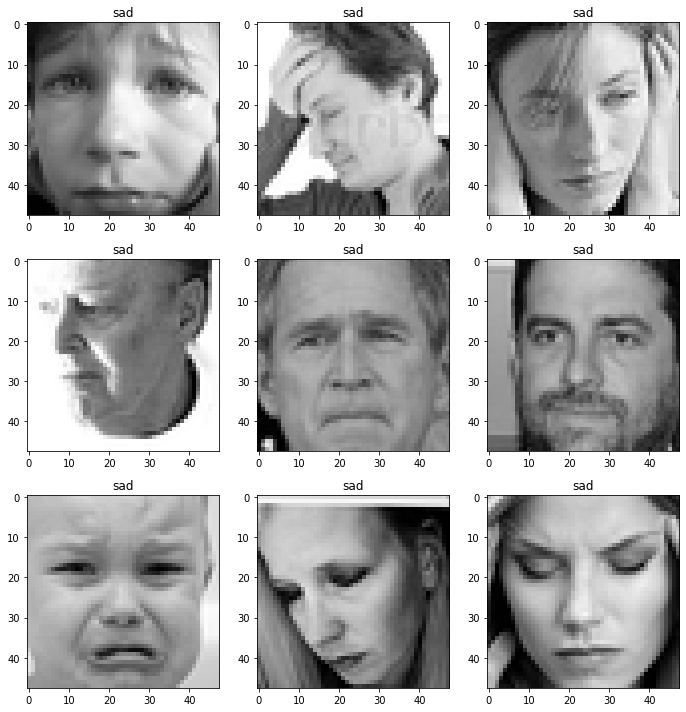

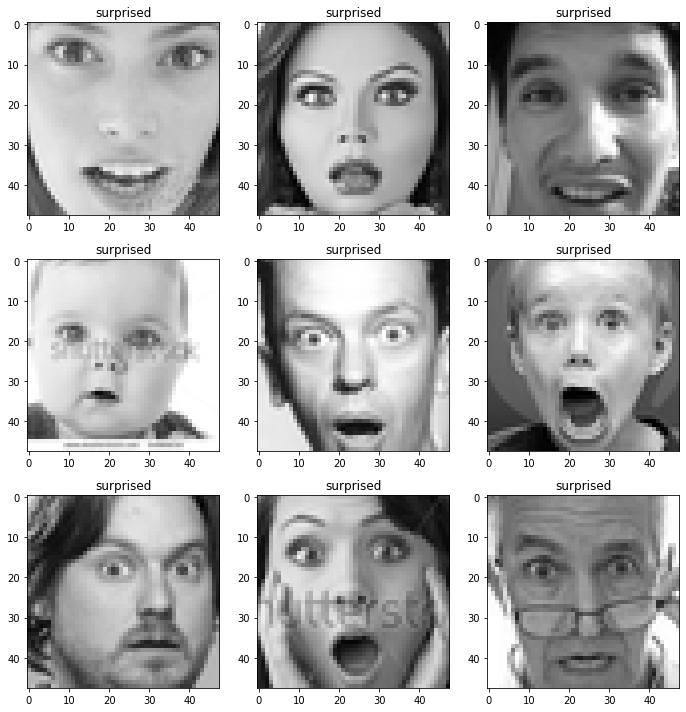

In [141]:
def display_images(emotion):
    plt.figure(figsize=(10,10))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i) #Form a 3x3 grid for each label
        img = image.load_img(train_dir + '/' + emotion + "/" + os.listdir(train_dir + '/' + emotion)[i], target_size=(48, 48)) #load images
        plt.title(emotion) #display image label
        plt.imshow(img) #display image
        plt.tight_layout() #format images
    plt.show()

for i in os.listdir(train_dir):
    display_images(i)

# check how many images per emotion in the dataset

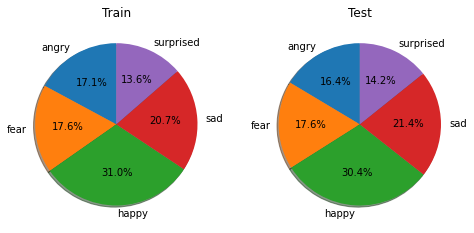

Emotion : angry
	Training : 3995
	 Testing : 958
Emotion : fear
	Training : 4097
	 Testing : 1024
Emotion : happy
	Training : 7215
	 Testing : 1774
Emotion : sad
	Training : 4830
	 Testing : 1247
Emotion : surprised
	Training : 3171
	 Testing : 831


In [4]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))

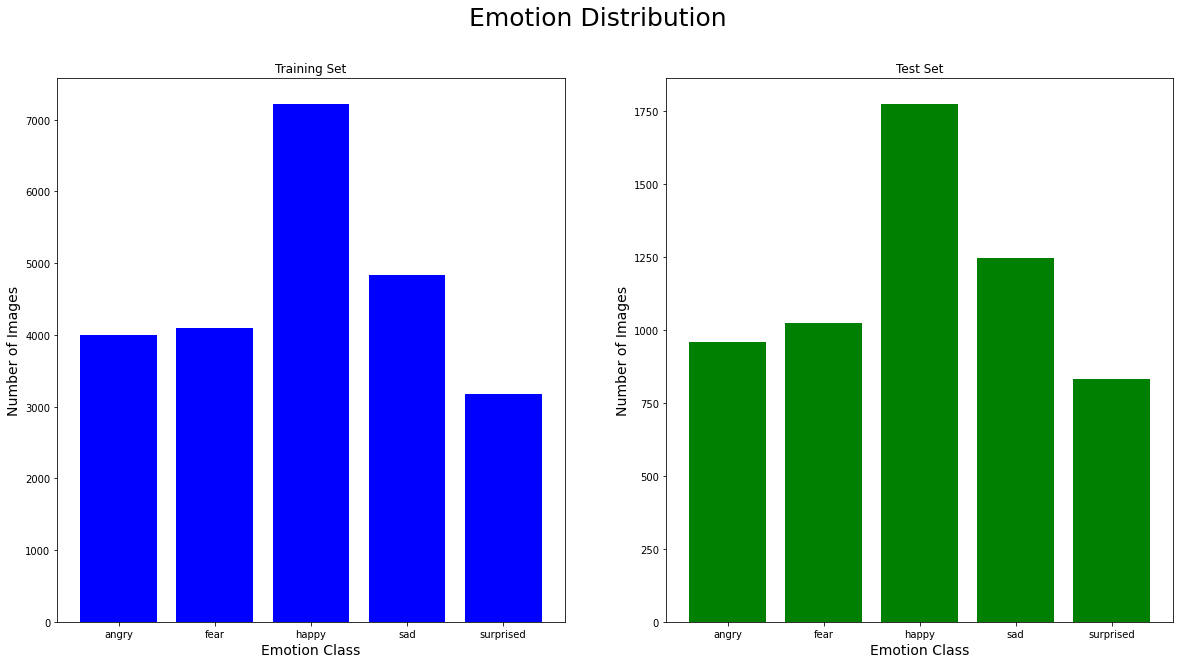

In [9]:
#bar charts
train_dist = np.array([len(os.listdir(train_dir+i+'/')) for i in labels])
test_dist = np.array([len(os.listdir(test_dir+i+'/')) for i in labels])
x = labels

plt.figure(figsize=(20,10))
plt.suptitle('Emotion Distribution', fontsize=25)

ax1 = plt.subplot(1,2,1)
ax1.set_title('Training Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, train_dist, color='blue')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Test Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, test_dist, color='green')
plt.show()

# data preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range= 0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

#Read our images to the data augmentations
#Generates batches of augmented data
train = train_datagen.flow_from_directory(train_dir,
                                          subset='training',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

valid = train_datagen.flow_from_directory(train_dir,
                                          subset='validation',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

test = test_datagen.flow_from_directory(test_dir,
                                        color_mode = 'grayscale',
                                        target_size = (48, 48),
                                        batch_size = 64,
                                        shuffle=False,
                                        class_mode = 'categorical')

Found 18647 images belonging to 5 classes.
Found 4661 images belonging to 5 classes.
Found 5834 images belonging to 5 classes.


In [4]:
train.class_indices

{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprised': 4}

In [5]:
test.class_indices

{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprised': 4}

# Model 1

# 8 convulational layers & 4 max pooling 
# with 50 epochs, batchnormalisation


In [5]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(5,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                        

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model_1 = model.fit(train, validation_data=valid, epochs=50)

Epoch 1/50
292/292 [==============================] - 260s 880ms/step - loss: 2.4855 - accuracy: 0.2342 - val_loss: 1.6746 - val_accuracy: 0.3107
Epoch 2/50
292/292 [==============================] - 212s 726ms/step - loss: 2.2133 - accuracy: 0.2598 - val_loss: 1.5737 - val_accuracy: 0.3238
Epoch 3/50
292/292 [==============================] - 244s 834ms/step - loss: 2.0907 - accuracy: 0.2626 - val_loss: 1.5763 - val_accuracy: 0.3291
Epoch 4/50
292/292 [==============================] - 215s 736ms/step - loss: 1.9884 - accuracy: 0.2746 - val_loss: 1.5783 - val_accuracy: 0.3304
Epoch 5/50
292/292 [==============================] - 213s 728ms/step - loss: 1.8912 - accuracy: 0.2840 - val_loss: 1.5971 - val_accuracy: 0.3364
Epoch 6/50
292/292 [==============================] - 210s 720ms/step - loss: 1.8308 - accuracy: 0.2989 - val_loss: 1.5724 - val_accuracy: 0.3491
Epoch 7/50
292/292 [==============================] - 210s 719ms/step - loss: 1.7627 - accuracy: 0.3080 - val_loss: 1.5401 -

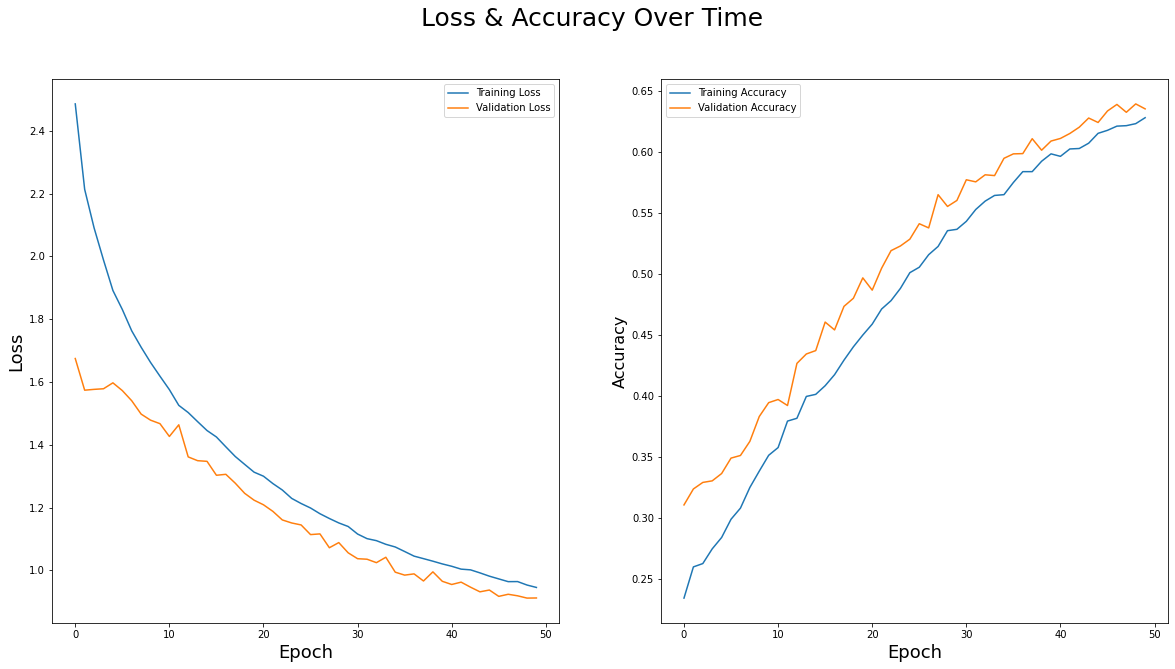

In [9]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(model_1.history['loss'], label='Training Loss')
plt.plot(model_1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_1.history['accuracy'], label='Training Accuracy')
plt.plot(model_1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

# now test the model with test images

In [10]:
y_pred = model.predict(test)

In [11]:
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

In [12]:
y_actual = test.classes[test.index_array]

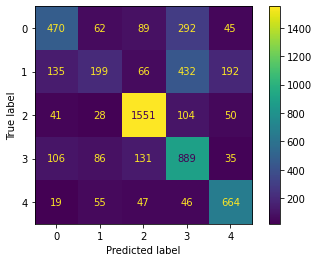

In [13]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.5789    0.6357    0.6060       958
           1     0.5611    0.3721    0.4474      1024
           2     0.8822    0.8867    0.8845      1774
           3     0.5635    0.7185    0.6317      1247
           4     0.8205    0.7208    0.7675       831

    accuracy                         0.6956      5834
   macro avg     0.6813    0.6668    0.6674      5834
weighted avg     0.6991    0.6956    0.6913      5834



# results

In [14]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

92/92 [==============================] - 8s 85ms/step - loss: 0.8793 - accuracy: 0.6467


# visualisation of results


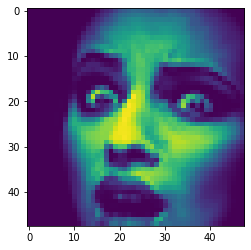

In [15]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions/Test/surprised/im27.png',
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [16]:
labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

[4.8294407e-21, 1.0, 0.0, 0.0, 1.1683632e-33]
{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprised': 4}


In [17]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])
#wrong prediction

Prediction: fear


# Surprised example
wrong prediction

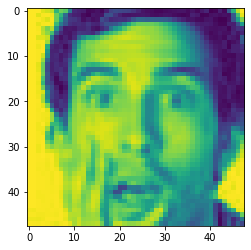

In [18]:
#checfking the example pic of surperised with the current model
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp1_surperise.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

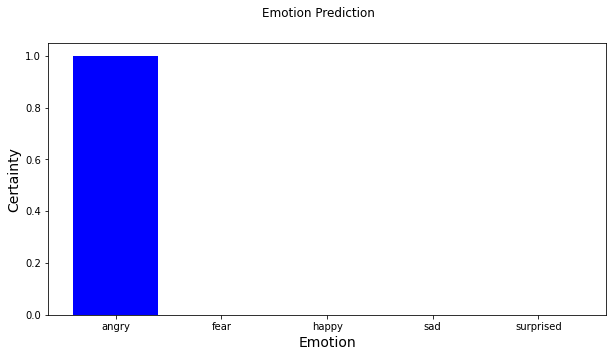

In [19]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#wrong prediction prediction

# Sad example
wrong prediction

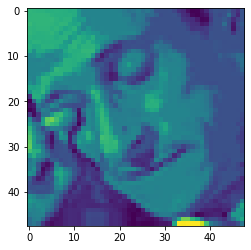

In [20]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp2_sad.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

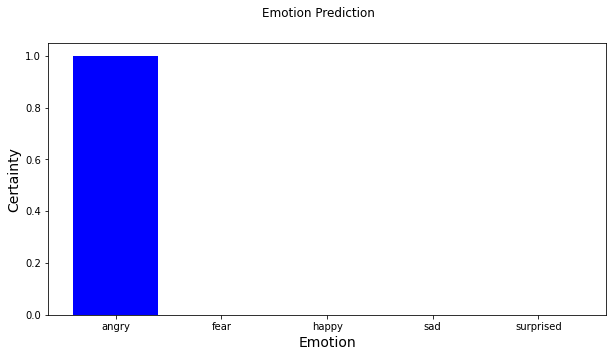

In [21]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#wrong prediction

# happy example
wrong prediction

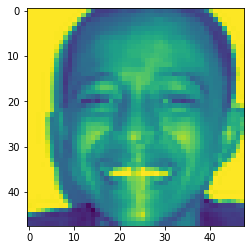

In [22]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp3_happy.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

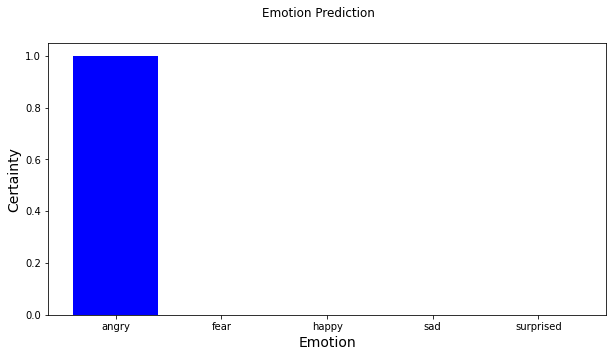

In [23]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# fear example
wrong prediction

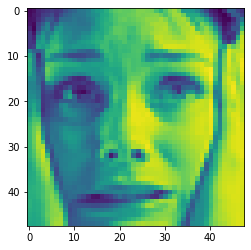

In [24]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp4_fear.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

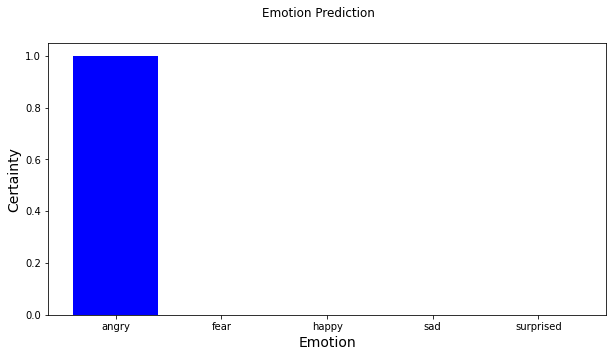

In [25]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# angry example
right prediction

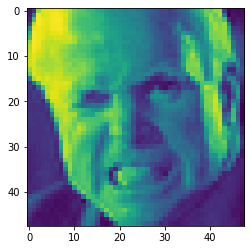

In [26]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp5_angry.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

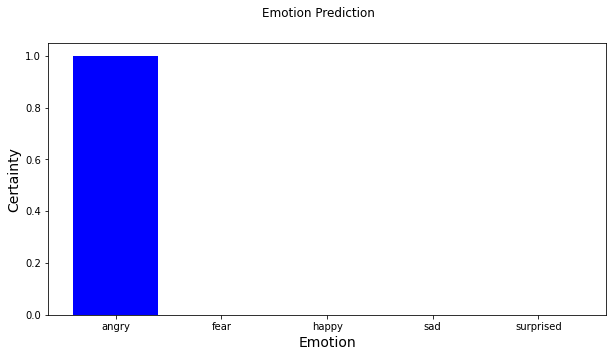

In [27]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# model 2

# 5 convulational layers & 5 avg pooling
# with 20 epcohs, mobilenetV2 pre-trained model & fine tuning

In [28]:
data_dir = 'C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions/train'

data_test_dir = data_dir + '/test/'

# coverting images to metrices 

In [53]:
batch_size = 32
img_height = 48
img_width = 48
image_size = (img_height, img_width)

train_ds = tf.keras.preprocessing.image_dataset_from_directory( 
data_dir,
validation_split=0.2,
subset='training',
seed =123,
image_size = image_size,
batch_size = batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory( 
data_dir,
validation_split=0.2,
subset='validation',
seed =123,
image_size = (img_height, img_width),
batch_size = batch_size)

class_names = train_ds.class_names

print(class_train_names)

Found 23308 files belonging to 5 classes.
Using 18647 files for training.
Found 23308 files belonging to 5 classes.
Using 4661 files for validation.
['angry', 'fear', 'happy', 'sad', 'surprised']


# autotune to pre-fetch the data and cache it

In [30]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

image_batch, label_batch = next(iter(normalized_ds))

first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

num_classes = 5

0.0 0.9843138


# CNN model, 5 convualtional layers & 5 avergae pooling layers & 20 epochs

In [48]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./225, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding= 'same', activation='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(64, 3, padding= 'same', activation='relu'), 
    layers.AveragePooling2D(),
    layers.Conv2D(128, 3, padding= 'same', activation='relu'), 
    layers.AveragePooling2D(),
    layers.Conv2D(256, 3, padding= 'same', activation='relu'), 
    layers.AveragePooling2D(),
    layers.Conv2D(512, 3, padding= 'same', activation='relu'), 
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
             loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [49]:
epochs = 20
model_2 = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

epochs_range =range(epochs)

Epoch 1/20
583/583 [==============================] - 54s 93ms/step - loss: 1.5607 - accuracy: 0.3124 - val_loss: 1.5373 - val_accuracy: 0.3192
Epoch 2/20
583/583 [==============================] - 56s 97ms/step - loss: 1.4930 - accuracy: 0.3498 - val_loss: 1.4152 - val_accuracy: 0.3946
Epoch 3/20
583/583 [==============================] - 57s 98ms/step - loss: 1.3523 - accuracy: 0.4299 - val_loss: 1.2783 - val_accuracy: 0.4654
Epoch 4/20
583/583 [==============================] - 57s 98ms/step - loss: 1.2419 - accuracy: 0.4843 - val_loss: 1.2207 - val_accuracy: 0.4939
Epoch 5/20
583/583 [==============================] - 57s 98ms/step - loss: 1.1593 - accuracy: 0.5200 - val_loss: 1.1426 - val_accuracy: 0.5263
Epoch 6/20
583/583 [==============================] - 58s 99ms/step - loss: 1.0832 - accuracy: 0.5562 - val_loss: 1.1169 - val_accuracy: 0.5385
Epoch 7/20
583/583 [==============================] - 58s 99ms/step - loss: 1.0058 - accuracy: 0.5898 - val_loss: 1.0689 - val_accuracy:

# plot of accuracy

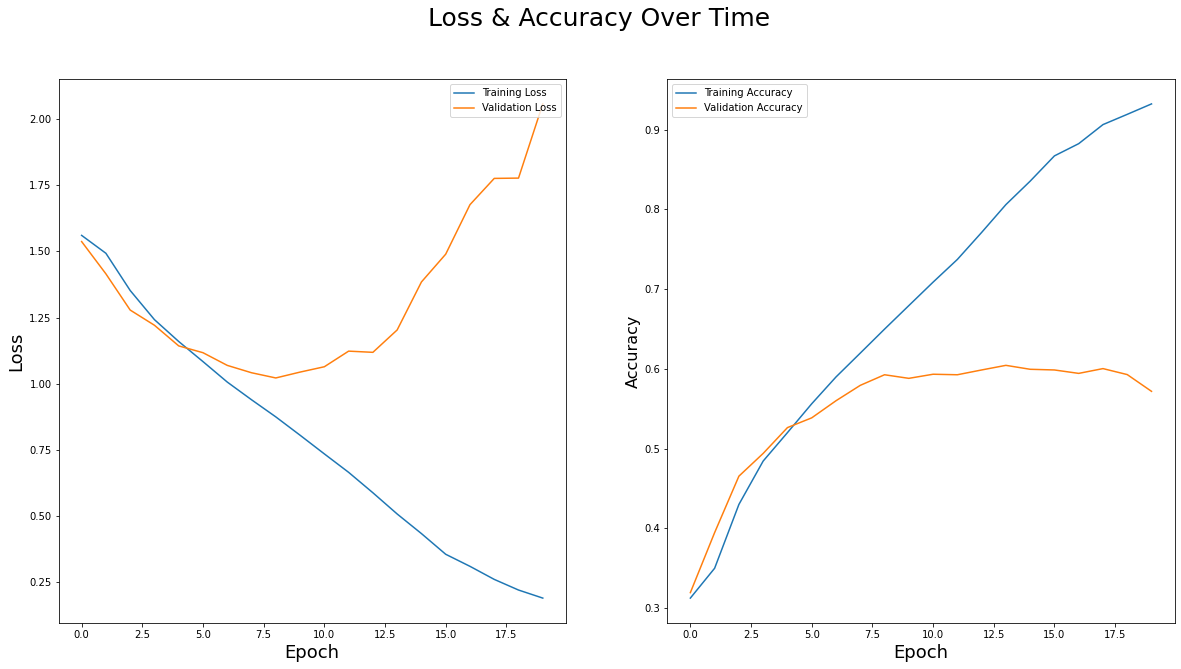

In [50]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(model_2.history['loss'], label='Training Loss')
plt.plot(model_2.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_2.history['accuracy'], label='Training Accuracy')
plt.plot(model_2.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

# data augmentation

In [51]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('vertical'),
 
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])


# converting the images from matrices to confirm if transformation actualy works

(32, 48, 48, 3)
(32,)


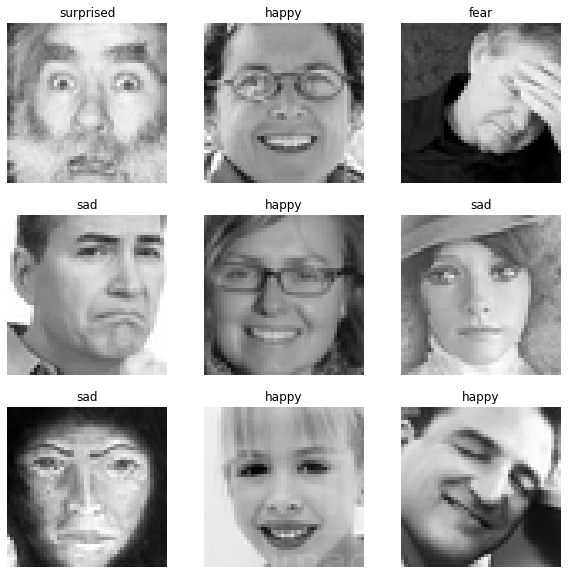

In [54]:
plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

# transfer learning

# 1. feature extraction
using pre-trained model from mobilenetv2-imagenet

In [55]:
IMG_SHAPE = image_size + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE, include_top = False, weights = 'imagenet')

image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 2, 2, 1280)


# creating base model

In [56]:
base_model.trainable = False

base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average =global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(5)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 6, 6, 144)   576         ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 6, 6, 144)    0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 6, 6, 32)     4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 6, 6, 32)    128         ['block_3_project[0][0]']        
 lization)                                                                                        
          

                                                                                                  
 block_7_expand_relu (ReLU)     (None, 3, 3, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 3, 3, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 3, 3, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_depthwise_relu (ReLU)  (None, 3, 3, 384)    0           ['block_7_depthwise_BN[0][0]']   
          

 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 3, 3, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 3, 3, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 3, 3, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_depthwise (DepthwiseC  (None, 3, 3, 576)   5184        ['block_11_expand_relu[0][0]']   
 onv2D)   

 block_14_depthwise_relu (ReLU)  (None, 2, 2, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 2, 2, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 2, 2, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 2, 2, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
                                                                                                  
 block_15_

In [57]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# pre-process the data before learning to make sure the pixel matrices are compatible with the model

In [63]:
inputs = tf.keras.Input(shape = (48, 48, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training = False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.Adam(lr = base_learning_rate), 
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

model.summary()

len(model.trainable_variables)
intial_epochs = 20

loss0, accuracy0 = model.evaluate(val_ds)

print('intial loss: {:.2f}'.format(loss0))
print(('intial accuracy: {:.2f}'.format(accuracy0)))

model_2 = model.fit(train_ds, epochs= intial_epochs, validation_data=val_ds)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 sequential_4 (Sequential)   (None, 48, 48, 3)         0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 48, 48, 3)        0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 48, 48, 3)        0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                           

# 2. fine tuning

In [64]:
base_model.trainable = True
base_model.summary()

print('Number of layers in the base model', len(base_model.layers))

fine_tune_at= 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 6, 6, 144)   576         ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 6, 6, 144)    0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 6, 6, 32)     4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 6, 6, 32)    128         ['block_3_project[0][0]']        
 lization)                                                                                        
          

                                                                                                  
 block_7_expand_relu (ReLU)     (None, 3, 3, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 3, 3, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 3, 3, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_depthwise_relu (ReLU)  (None, 3, 3, 384)    0           ['block_7_depthwise_BN[0][0]']   
          

 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 3, 3, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 3, 3, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 3, 3, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_depthwise (DepthwiseC  (None, 3, 3, 576)   5184        ['block_11_expand_relu[0][0]']   
 onv2D)   

 block_14_depthwise_relu (ReLU)  (None, 2, 2, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 2, 2, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 2, 2, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 2, 2, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
                                                                                                  
 block_15_

In [65]:
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = base_learning_rate/10), 
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics = ['accuracy'])

In [66]:
intial_epochs = 20
fine_tune__epochs = 20

total_epochs = intial_epochs + fine_tune__epochs

model_2_fine = model.fit(train_ds, epochs=total_epochs, initial_epoch = model_2.epoch[-1], validation_data =val_ds)

Epoch 20/40
583/583 [==============================] - 32s 52ms/step - loss: 1.0501 - accuracy: 0.5760 - val_loss: 1.0832 - val_accuracy: 0.5580
Epoch 21/40
583/583 [==============================] - 34s 58ms/step - loss: 1.0390 - accuracy: 0.5780 - val_loss: 1.0789 - val_accuracy: 0.5561
Epoch 22/40
583/583 [==============================] - 34s 58ms/step - loss: 1.0377 - accuracy: 0.5793 - val_loss: 1.0768 - val_accuracy: 0.5555
Epoch 23/40
583/583 [==============================] - 34s 58ms/step - loss: 1.0320 - accuracy: 0.5842 - val_loss: 1.0730 - val_accuracy: 0.5572
Epoch 24/40
583/583 [==============================] - 34s 59ms/step - loss: 1.0218 - accuracy: 0.5862 - val_loss: 1.0731 - val_accuracy: 0.5525
Epoch 25/40
583/583 [==============================] - 34s 59ms/step - loss: 1.0267 - accuracy: 0.5859 - val_loss: 1.0707 - val_accuracy: 0.5572
Epoch 26/40
583/583 [==============================] - 34s 58ms/step - loss: 1.0214 - accuracy: 0.5897 - val_loss: 1.0699 - val_ac

# model evulation with test dataset

In [73]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory( 
test_dir,
seed =123,
image_size = image_size,
batch_size = batch_size)

Found 5834 files belonging to 5 classes.


In [74]:
train_loss, train_acc = model.evaluate(train_ds)
test_loss, test_acc = model.evaluate(test_ds)


183/183 [==============================] - 5s 27ms/step - loss: 1.0724 - accuracy: 0.5732


In [75]:
print('Model evaluation:')
print('\n')
print('train loss:', train_loss)
print('train accuracy:', train_acc)
print('\n')
print('Test loss:', test_loss)
print('test accuracy:', test_acc)

Model evaluation:


train loss: 0.9708037972450256
train accuracy: 0.6083552241325378


Test loss: 1.0724117755889893
test accuracy: 0.5731916427612305


# Model 3

# 4 convulational layers & 4 max pooling
# with 20 epochs & VGG19 pretrained model

In [8]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./225, input_shape=(48,48,1)),
    layers.Conv2D(32, 3, padding= 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding= 'same', activation='relu'), 
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(128, 3, padding= 'same', activation='relu'), 
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(256, 3, padding= 'same', activation='relu'), 
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation = 'softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                    

# use VGG19 from imagenet using a pretrained model

In [13]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

vgg = VGG19(weights='imagenet', include_top=False, classes=5)

#freeze
for layer in vgg.layers:
    layer.trainable = False
    
input = tf.keras.Input(shape=(48,48,1)) #what is input here

conv = Conv2D(3, kernel_size=(3,3), padding='same')(input)
vgg = vgg(conv)
x = Flatten()(vgg)
pred = Dense(5, activation='softmax')(x)

model = Model(inputs=input, outputs=pred)

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 3)         30        
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 20,026,979
Trainable params: 2,595
Non-trainable params: 20,024,384
_________________________________________________________________


In [15]:
# to use callback use this code
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', 
                                                  classes=np.unique(train.classes), 
                                                  y=train.classes)
class_weights = dict(zip(np.unique(train.classes),class_weights))

#saves our best model to this location
filepath = 'C:/Users/asmam/OneDrive/Documents/Programme/project/Model_3.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5' 

callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_delta=0.0001, verbose=1),
             tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss',verbose=1, save_best_only=True, mode='min'),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1,restore_best_weights=True)]


In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
emotion = model.fit(train, validation_data=valid, epochs=20, callbacks=callbacks, class_weight=class_weights)

Epoch 1/20
292/292 [==============================] - ETA: 0s - loss: 1.6861 - accuracy: 0.2520
Epoch 1: val_loss improved from inf to 1.58620, saving model to C:/Users/asmam/OneDrive/Documents/Programme/project\Model_3.epoch01-loss1.59.hdf5
292/292 [==============================] - 1145s 4s/step - loss: 1.6861 - accuracy: 0.2520 - val_loss: 1.5862 - val_accuracy: 0.2654 - lr: 1.0000e-04
Epoch 2/20
292/292 [==============================] - ETA: 0s - loss: 1.5778 - accuracy: 0.2787
Epoch 2: val_loss improved from 1.58620 to 1.56859, saving model to C:/Users/asmam/OneDrive/Documents/Programme/project\Model_3.epoch02-loss1.57.hdf5
292/292 [==============================] - 1266s 4s/step - loss: 1.5778 - accuracy: 0.2787 - val_loss: 1.5686 - val_accuracy: 0.2931 - lr: 1.0000e-04
Epoch 3/20
292/292 [==============================] - ETA: 0s - loss: 1.5588 - accuracy: 0.2946
Epoch 3: val_loss improved from 1.56859 to 1.55386, saving model to C:/Users/asmam/OneDrive/Documents/Programme/proj

# saving the model

In [18]:
#Saving our model/weights
model.save('emotion-detection.h5')
model.save_weights('emotion_weight.h5')
np.save("history", emotion.history)
print('saved model to disk.')

saved model to disk.


# plot of results

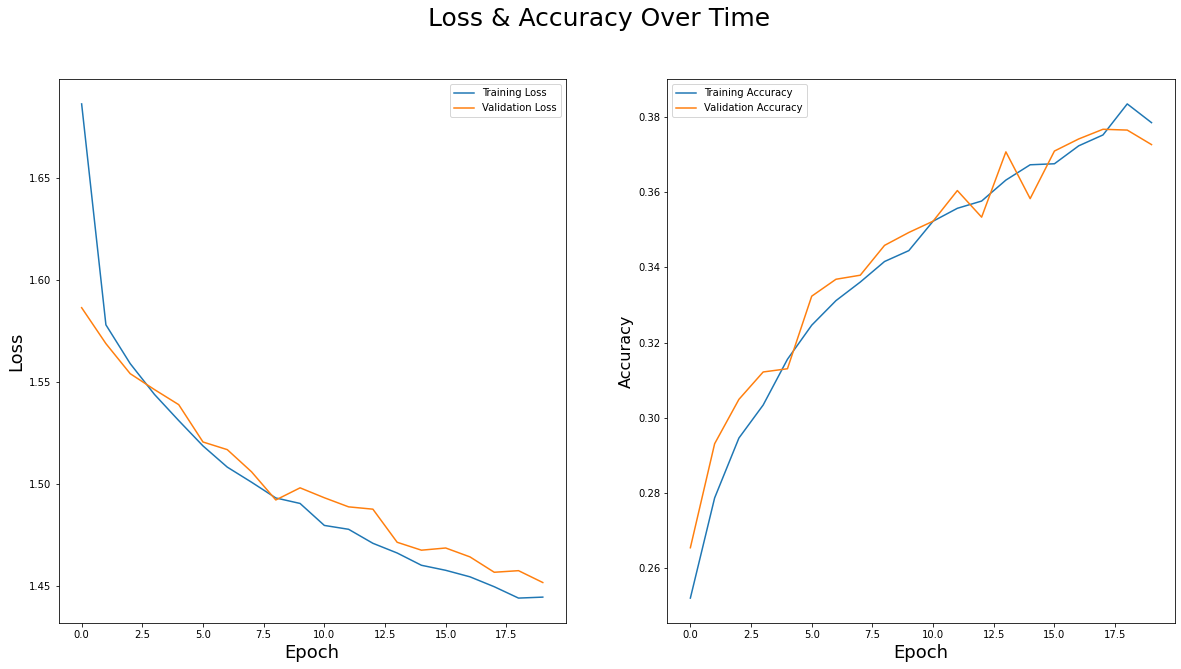

In [19]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion.history['loss'], label='Training Loss')
plt.plot(emotion.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion.history['accuracy'], label='Training Accuracy')
plt.plot(emotion.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

# model evaluation

In [20]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

92/92 [==============================] - 49s 531ms/step - loss: 1.4106 - accuracy: 0.4001


In [21]:
#loading my saved model
from keras.models import load_model
mod = load_model('Model_3.epoch20-loss1.45.hdf5') #used the best epoch the model learned new thing

# visualisation of results

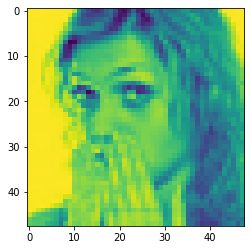

In [22]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions/Test/fear/im26.png',
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [23]:
labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

[1.5378844e-24, 1.1418854e-34, 0.0, 0.0, 1.0]
{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprised': 4}


In [24]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])
#wrong prediction

Prediction: surprised


#  Surpersied Example 
correct prediction

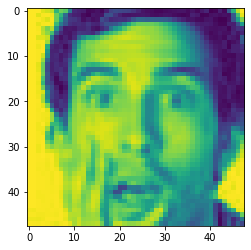

In [25]:
#checfking the example pic of surperised with the current model
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp1_surperise.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: surprised


<BarContainer object of 5 artists>

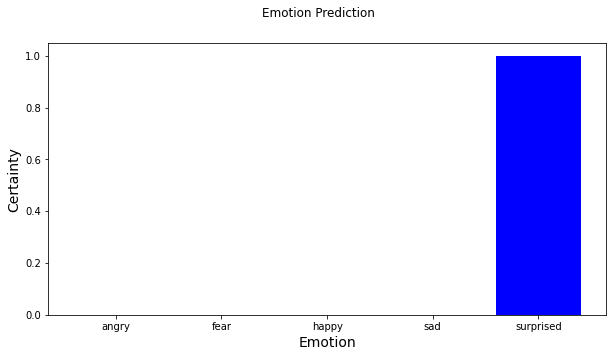

In [26]:
img = np.expand_dims(img,axis = 0) 
img = img.reshape(1,48,48,1)
result = model.predict(img) 
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')


# Sad example
wrong prediction

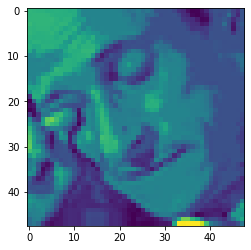

In [28]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp2_sad.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: surprised


<BarContainer object of 5 artists>

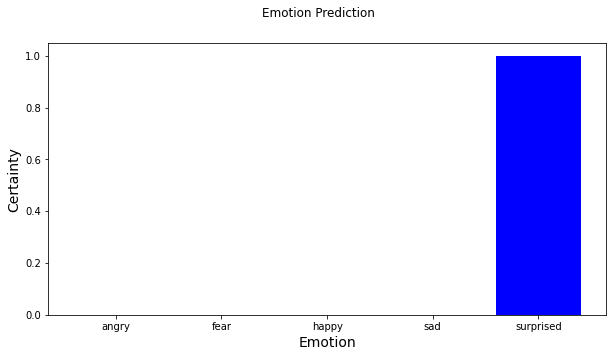

In [29]:
img = np.expand_dims(img,axis = 0) 
img = img.reshape(1,48,48,1)
result = model.predict(img) 
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')



# Happy example
wrong prediction

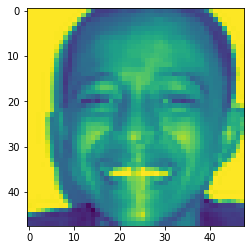

In [30]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp3_happy.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

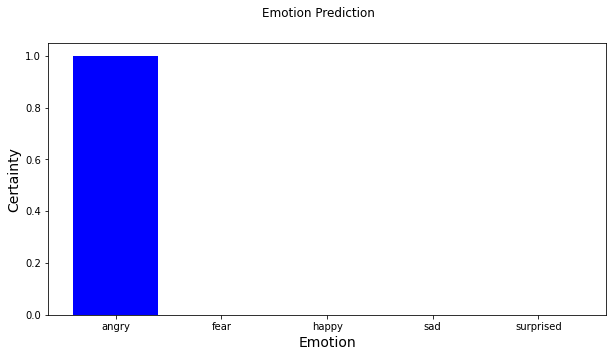

In [31]:
img = np.expand_dims(img,axis = 0) 
img = img.reshape(1,48,48,1)
result = model.predict(img) 
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')


# fear example 
wrong prediction

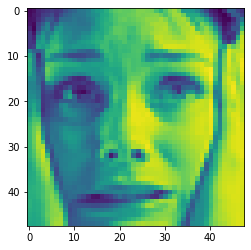

In [32]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp4_fear.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: surprised


<BarContainer object of 5 artists>

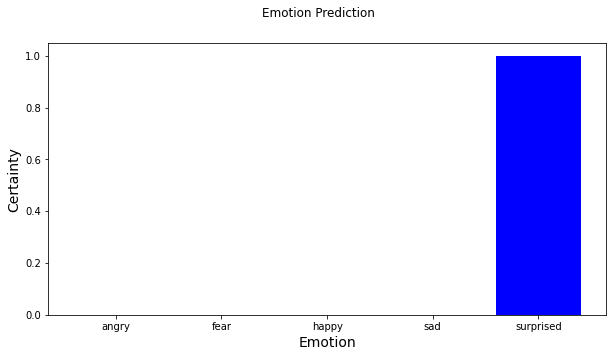

In [33]:
img = np.expand_dims(img,axis = 0) 
img = img.reshape(1,48,48,1)
result = model.predict(img) 
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# angry example
correct prediction

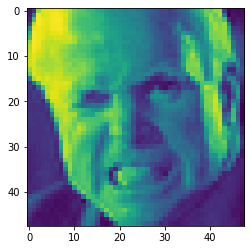

In [34]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp5_angry.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

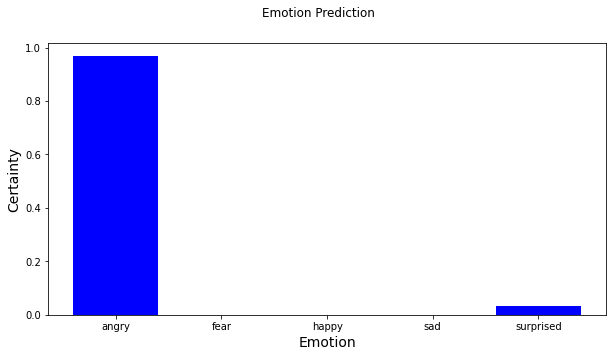

In [35]:
img = np.expand_dims(img,axis = 0) 
img = img.reshape(1,48,48,1)
result = model.predict(img) 
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# Model 4

# CNN model, 4 convualtional layers & 4 max pooling layers 
# with 20 epochs no pretrained model

In [44]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./225, input_shape=(48,48,1)),
    layers.Conv2D(32, 3, padding= 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(64, 3, padding= 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(128, 3, padding= 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(256, 3, padding= 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation = 'softmax')
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
emotion2 = model.fit(train, validation_data=valid, epochs=20)

Epoch 1/20
292/292 [==============================] - 100s 340ms/step - loss: 1.5736 - accuracy: 0.3096 - val_loss: 1.5743 - val_accuracy: 0.3096
Epoch 2/20
292/292 [==============================] - 37s 128ms/step - loss: 1.5701 - accuracy: 0.3095 - val_loss: 1.5719 - val_accuracy: 0.3096
Epoch 3/20
292/292 [==============================] - 38s 130ms/step - loss: 1.5700 - accuracy: 0.3095 - val_loss: 1.5716 - val_accuracy: 0.3096
Epoch 4/20
292/292 [==============================] - 38s 130ms/step - loss: 1.5697 - accuracy: 0.3095 - val_loss: 1.5685 - val_accuracy: 0.3096
Epoch 5/20
292/292 [==============================] - 39s 132ms/step - loss: 1.5695 - accuracy: 0.3095 - val_loss: 1.5718 - val_accuracy: 0.3096
Epoch 6/20
292/292 [==============================] - 38s 131ms/step - loss: 1.5694 - accuracy: 0.3095 - val_loss: 1.5694 - val_accuracy: 0.3096
Epoch 7/20
292/292 [==============================] - 37s 128ms/step - loss: 1.5696 - accuracy: 0.3095 - val_loss: 1.5696 - val_a

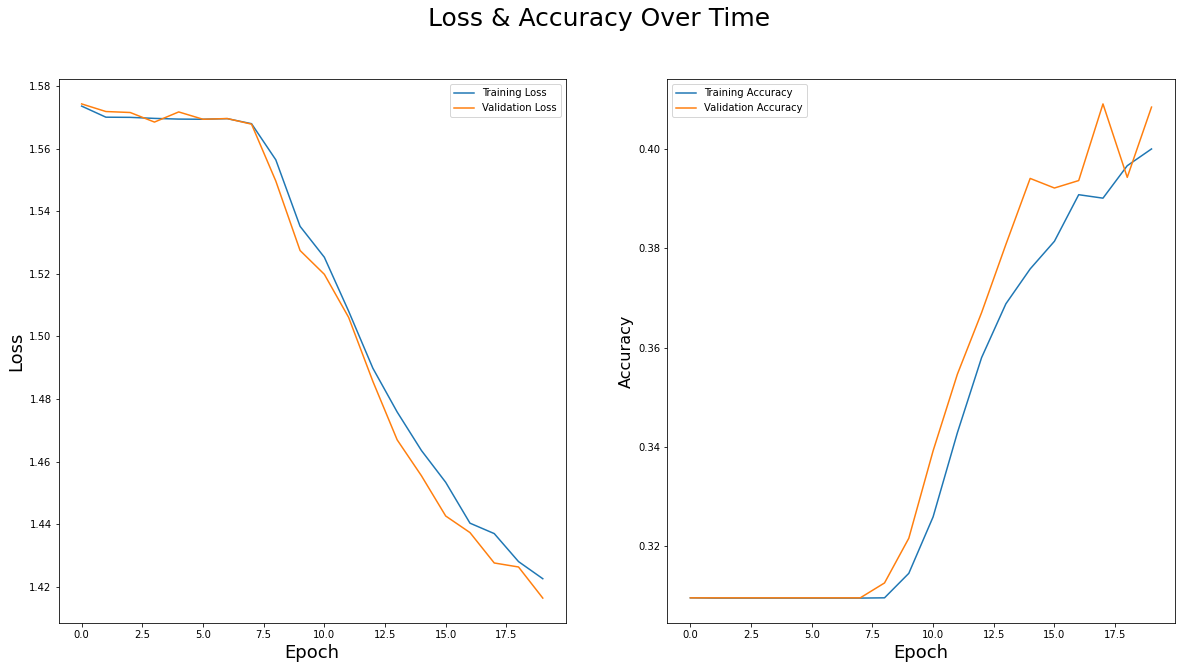

In [50]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion2.history['loss'], label='Training Loss')
plt.plot(emotion2.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion2.history['accuracy'], label='Training Accuracy')
plt.plot(emotion2.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

In [51]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

92/92 [==============================] - 10s 114ms/step - loss: 1.3901 - accuracy: 0.4134


# visualistion of predictions

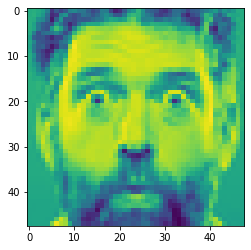

In [54]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions/Test/surprised/im30.png',
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [55]:
labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

[8.197453e-15, 2.0699687e-07, 0.9914791, 3.0892472e-10, 0.008520657]
{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprised': 4}


In [56]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])
#wrong prediction

Prediction: happy


# Example 1

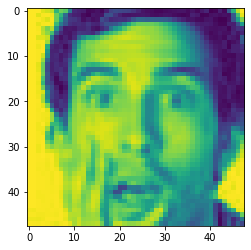

In [57]:
#checfking the example pic of surperised with the current model
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp1_surperise.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: surprised


<BarContainer object of 5 artists>

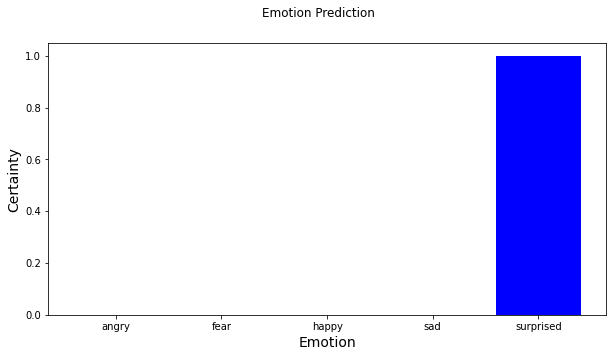

In [58]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#rigth prediction

# Example 5

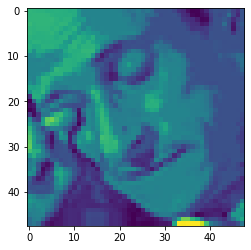

In [59]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp2_sad.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: happy


<BarContainer object of 5 artists>

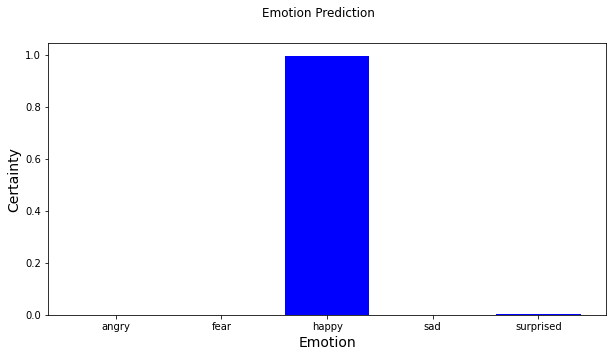

In [60]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#wrong prediction

# example 3

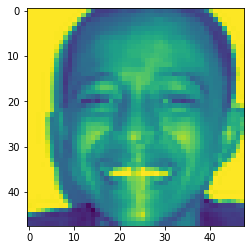

In [61]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp3_happy.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: happy


<BarContainer object of 5 artists>

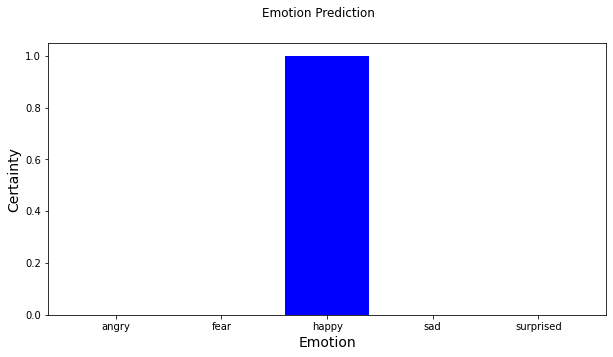

In [62]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#right prediction

# example 4

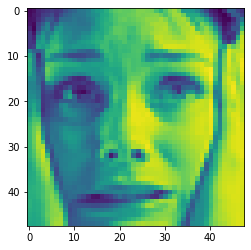

In [63]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp4_fear.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: happy


<BarContainer object of 5 artists>

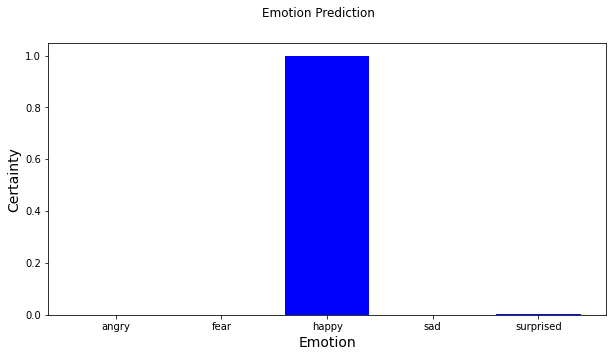

In [64]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#wrong prediction

# example 5

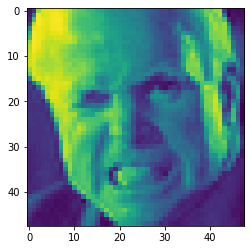

In [65]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp5_angry.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: happy


<BarContainer object of 5 artists>

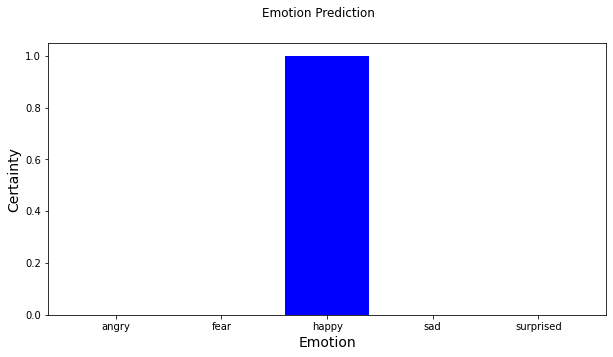

In [66]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#wrong prediction

# Model 5
# 6 convulational layers & 3 max pooling layers
# with 50 epochs, batchnormalisation VGG19 pretrained model

In [7]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(5,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                        

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_9 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_10 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                      

In [8]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

vgg = VGG19(weights='imagenet', include_top=False, classes=5)

#freeze
for layer in vgg.layers:
    layer.trainable = False
    
input = tf.keras.Input(shape=(48,48,1)) #what is input here

conv = Conv2D(3, kernel_size=(3,3), padding='same')(input)
vgg = vgg(conv)
x = Flatten()(vgg)
pred = Dense(5, activation='softmax')(x)

model = Model(inputs=input, outputs=pred)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 3)         30        
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 20,026,979
Trainable params: 2,595
Non-trainable params: 20,024,384
_________________________________________________________________


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
emotion3 = model.fit(train, validation_data=valid, epochs=50)

Epoch 1/50
292/292 [==============================] - 668s 2s/step - loss: 1.5957 - accuracy: 0.2798 - val_loss: 1.5649 - val_accuracy: 0.3113
Epoch 2/50
292/292 [==============================] - 673s 2s/step - loss: 1.5481 - accuracy: 0.3186 - val_loss: 1.5353 - val_accuracy: 0.3257
Epoch 3/50
292/292 [==============================] - 662s 2s/step - loss: 1.5233 - accuracy: 0.3366 - val_loss: 1.5150 - val_accuracy: 0.3403
Epoch 4/50
292/292 [==============================] - 663s 2s/step - loss: 1.5001 - accuracy: 0.3507 - val_loss: 1.4936 - val_accuracy: 0.3579
Epoch 5/50
292/292 [==============================] - 651s 2s/step - loss: 1.4814 - accuracy: 0.3579 - val_loss: 1.4763 - val_accuracy: 0.3703
Epoch 6/50
292/292 [==============================] - 648s 2s/step - loss: 1.4672 - accuracy: 0.3691 - val_loss: 1.4663 - val_accuracy: 0.3710
Epoch 7/50
292/292 [==============================] - 657s 2s/step - loss: 1.4581 - accuracy: 0.3752 - val_loss: 1.4545 - val_accuracy: 0.3855

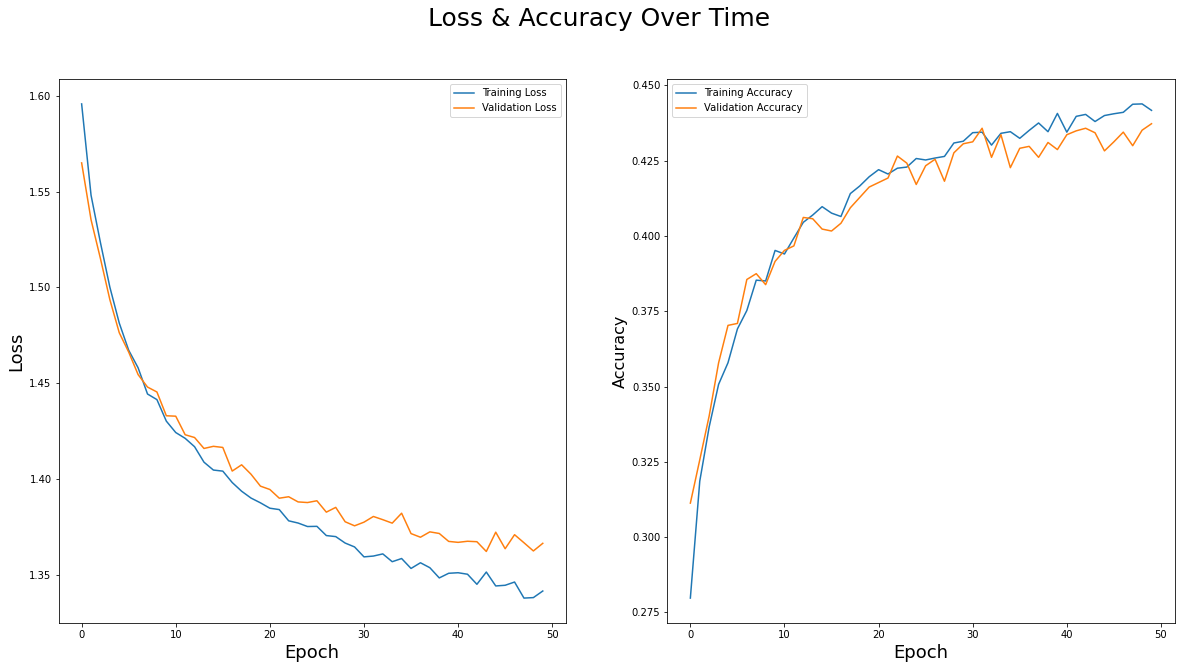

In [27]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion3.history['loss'], label='Training Loss')
plt.plot(emotion3.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion3.history['accuracy'], label='Training Accuracy')
plt.plot(emotion3.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

# model evaluation

In [28]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

92/92 [==============================] - 37s 405ms/step - loss: 1.3333 - accuracy: 0.4441


# visualisation of results

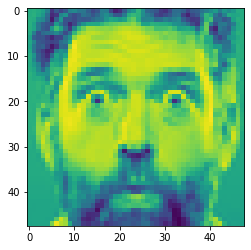

In [30]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions/Test/surprised/im30.png',
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [31]:
labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

[0.0, 1.3445491e-30, 0.0, 0.0, 1.0]
{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprised': 4}


In [32]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])

Prediction: surprised


# Example 1

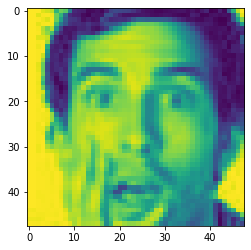

In [33]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp1_surperise.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: surprised


<BarContainer object of 5 artists>

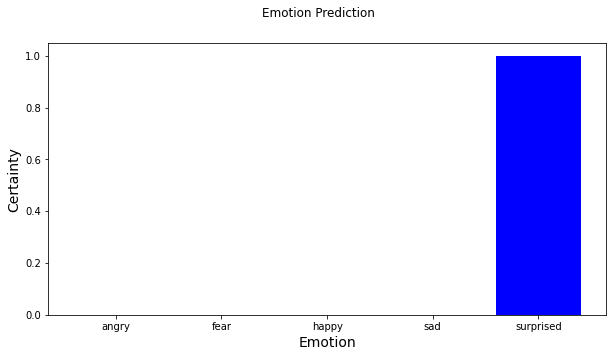

In [34]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#correct prediction

# example 2

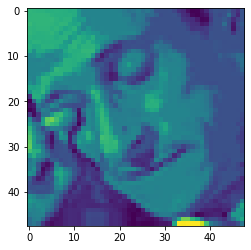

In [35]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp2_sad.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

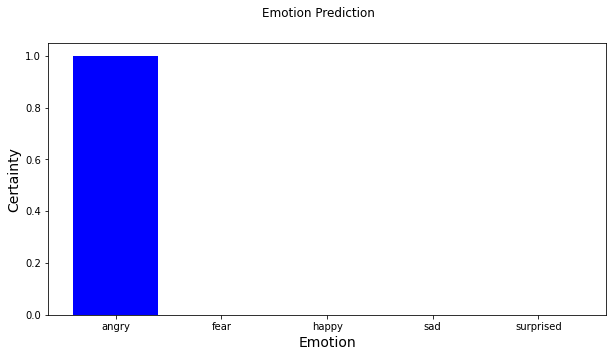

In [36]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#wrong prediction

# example 3

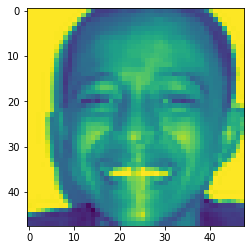

In [37]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp3_happy.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: surprised


<BarContainer object of 5 artists>

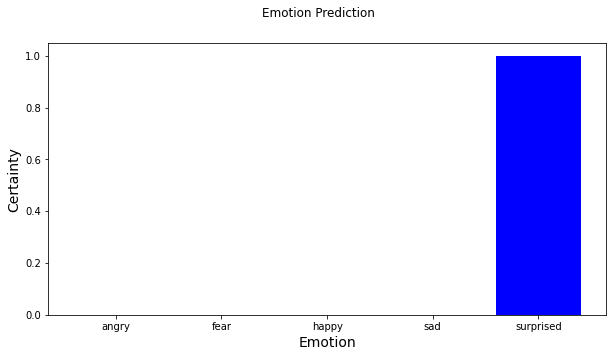

In [38]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#wrong prediction

# example 4

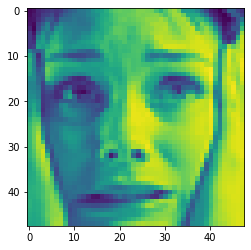

In [39]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp4_fear.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: surprised


<BarContainer object of 5 artists>

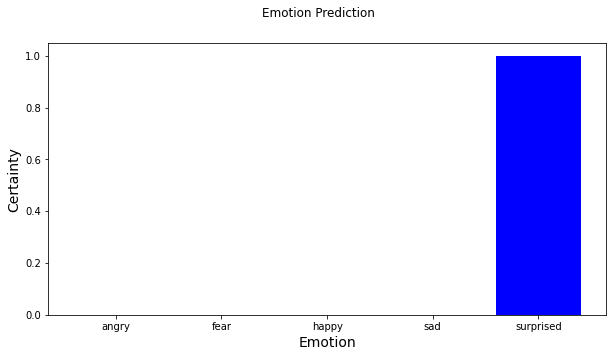

In [40]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#wrong prediction

# example 5

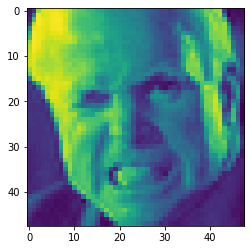

In [41]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp5_angry.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

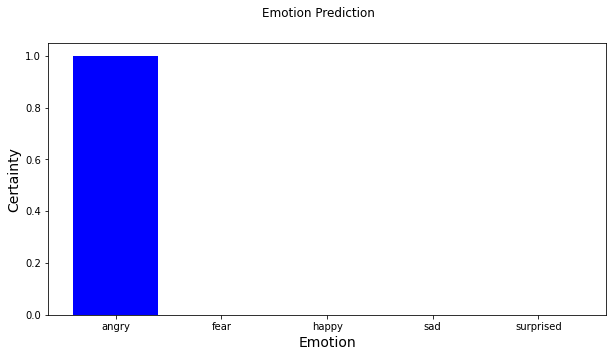

In [42]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')
#right predcition

# model 6

# 6 convluation layers, 3 max polling layers, 50 epochs, mobilenetV2

In [101]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(5,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 activation_11 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 activation_12 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                     

In [102]:
from tensorflow.keras.models import Model
mobv2 = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE, include_top = False, weights = 'imagenet')

#freeze
mobv2.trainable = False
    
input = tf.keras.Input(shape=(48,48,1)) #what is input here

conv = Conv2D(3, kernel_size=(3,3), padding='same')(input)
mobv2 = mobv2(conv)
x = Flatten()(mobv2)
pred = Dense(5, activation='softmax')(x)

model = Model(inputs=input, outputs=pred)

In [103]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 48, 48, 3)         30        
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 5120)              0         
                                                                 
 dense_9 (Dense)             (None, 5)                 25605     
                                                                 
Total params: 2,283,619
Trainable params: 25,635
Non-trainable params: 2,257,984
____________________________________________

In [104]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [105]:
emotion4 = model.fit(train, validation_data=valid, epochs=50)

Epoch 1/50
292/292 [==============================] - 132s 448ms/step - loss: 1.6718 - accuracy: 0.3129 - val_loss: 1.5617 - val_accuracy: 0.3452
Epoch 2/50
292/292 [==============================] - 46s 157ms/step - loss: 1.5237 - accuracy: 0.3653 - val_loss: 1.5113 - val_accuracy: 0.3742
Epoch 3/50
292/292 [==============================] - 47s 160ms/step - loss: 1.4879 - accuracy: 0.3801 - val_loss: 1.4833 - val_accuracy: 0.3832
Epoch 4/50
292/292 [==============================] - 47s 160ms/step - loss: 1.4627 - accuracy: 0.3878 - val_loss: 1.4664 - val_accuracy: 0.3843
Epoch 5/50
292/292 [==============================] - 47s 160ms/step - loss: 1.4381 - accuracy: 0.3995 - val_loss: 1.4569 - val_accuracy: 0.3999
Epoch 6/50
292/292 [==============================] - 47s 161ms/step - loss: 1.4329 - accuracy: 0.4001 - val_loss: 1.4528 - val_accuracy: 0.3883
Epoch 7/50
292/292 [==============================] - 47s 161ms/step - loss: 1.4167 - accuracy: 0.4099 - val_loss: 1.4404 - val_a

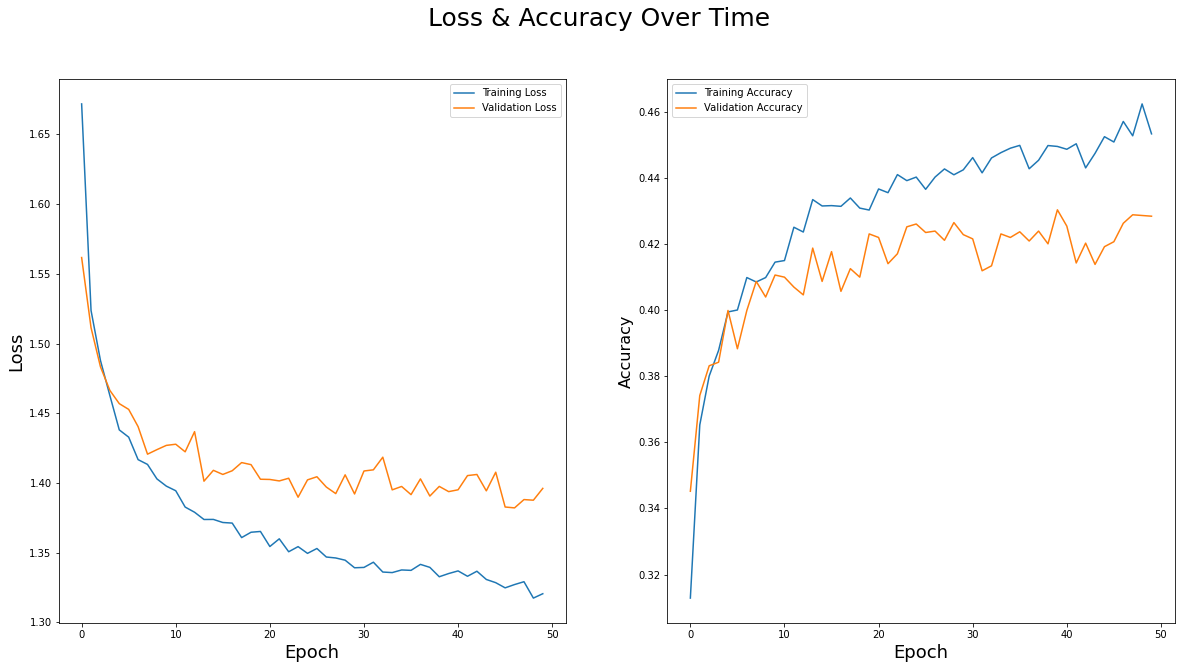

In [123]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion4.history['loss'], label='Training Loss')
plt.plot(emotion4.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion4.history['accuracy'], label='Training Accuracy')
plt.plot(emotion4.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

In [124]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

92/92 [==============================] - 37s 397ms/step - loss: 1.3582 - accuracy: 0.4304


# visualisation of results

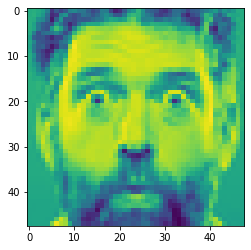

In [125]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions/Test/surprised/im30.png',
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [126]:
labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

[1.2871863e-11, 6.999642e-28, 0.0, 0.0, 1.0]
{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprised': 4}


In [127]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])

Prediction: surprised


# surpersied example
wrong prediction

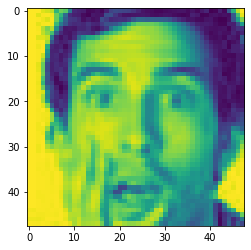

In [128]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp1_surperise.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

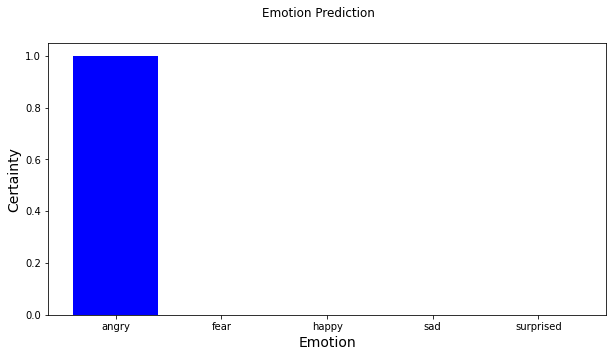

In [129]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# sad example
wrong prediction

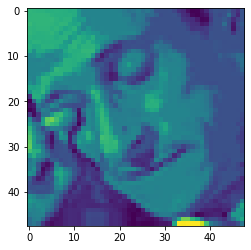

In [130]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp2_sad.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

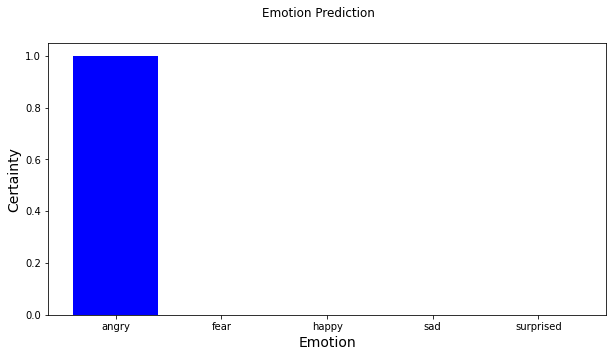

In [131]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# happy example
wrong prediction

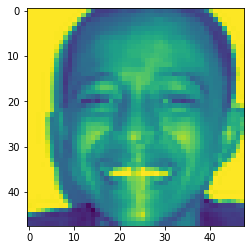

In [132]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp3_happy.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

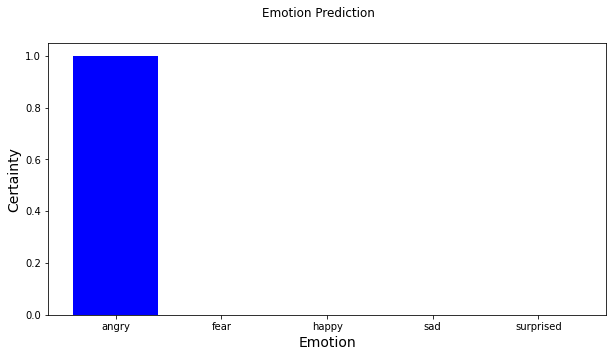

In [133]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# fear prediction
wrong prediction

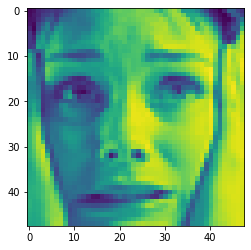

In [134]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp4_fear.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: surprised


<BarContainer object of 5 artists>

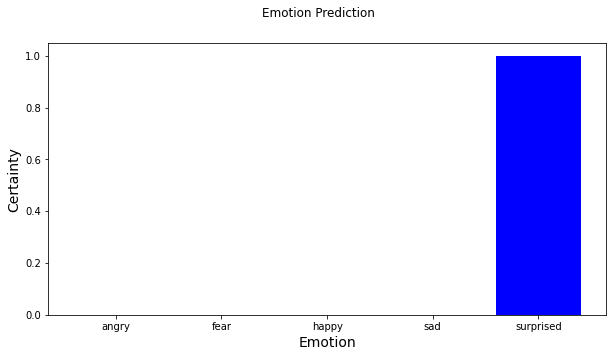

In [135]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# angry prediction

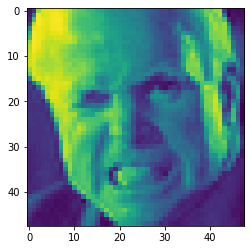

In [136]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp5_angry.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

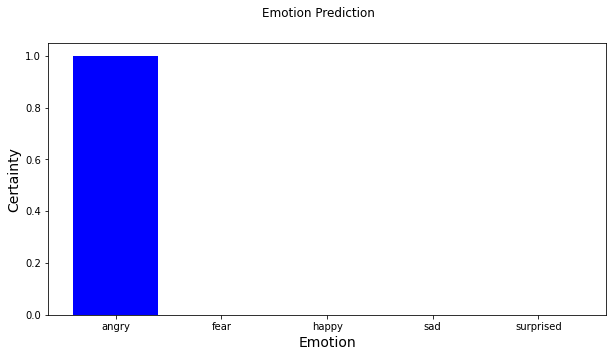

In [137]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# model 7 
# 4 convulational & 2 max pooling, 50 epochs, VGG19

In [6]:
#Initialize our model
model = tf.keras.Sequential()

#Input Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling to decrease dimension
model.add(Dropout(0.25)) #test

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling to decrease dimension
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten()) #Flattens our data into a vector

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

# vgg19 implimentation

In [9]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

vgg = VGG19(weights='imagenet', include_top=False, classes=5)

#freeze
for layer in vgg.layers:
    layer.trainable = False
    
input = tf.keras.Input(shape=(48,48,1)) #Our input image size

conv = Conv2D(3, kernel_size=(3,3), padding='same')(input)
vgg = vgg(conv)
x = Flatten()(vgg)
pred = Dense(5, activation='softmax')(x)

model = Model(inputs=input, outputs=pred)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 3)         30        
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 20,026,979
Trainable params: 2,595
Non-trainable params: 20,024,384
_________________________________________________________________


In [11]:
# to use callback use this code
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', 
                                                  classes=np.unique(train.classes), 
                                                  y=train.classes)
class_weights = dict(zip(np.unique(train.classes),class_weights))

#saves our best model to this location
filepath = 'C:/Users/asmam/OneDrive/Documents/Programme/project/Model7/Model_7.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5' 

callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_delta=0.0001, verbose=1),
             tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss',verbose=1, save_best_only=True, mode='min'),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1,restore_best_weights=True)]


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
emotion7 = model.fit(train, validation_data=valid, epochs=50, callbacks=callbacks, class_weight=class_weights)

Epoch 1/50
292/292 [==============================] - ETA: 0s - loss: 1.6404 - accuracy: 0.1908
Epoch 1: val_loss improved from inf to 1.61515, saving model to C:/Users/asmam/OneDrive/Documents/Programme/project/Model7\Model_7.epoch01-loss1.62.hdf5
292/292 [==============================] - 1145s 4s/step - loss: 1.6404 - accuracy: 0.1908 - val_loss: 1.6151 - val_accuracy: 0.2231 - lr: 1.0000e-04
Epoch 2/50
292/292 [==============================] - ETA: 0s - loss: 1.6100 - accuracy: 0.2372
Epoch 2: val_loss improved from 1.61515 to 1.59197, saving model to C:/Users/asmam/OneDrive/Documents/Programme/project/Model7\Model_7.epoch02-loss1.59.hdf5
292/292 [==============================] - 1198s 4s/step - loss: 1.6100 - accuracy: 0.2372 - val_loss: 1.5920 - val_accuracy: 0.2628 - lr: 1.0000e-04
Epoch 3/50
292/292 [==============================] - ETA: 0s - loss: 1.5946 - accuracy: 0.2627
Epoch 3: val_loss improved from 1.59197 to 1.57967, saving model to C:/Users/asmam/OneDrive/Documents/

# saving the model

In [15]:
#Saving our model/weights
model.save('emotion-detection7.h5')
model.save_weights('emotion_weight7.h5')
np.save("history", emotion7.history)
print('saved model to disk.')

saved model to disk.


# ploting the results

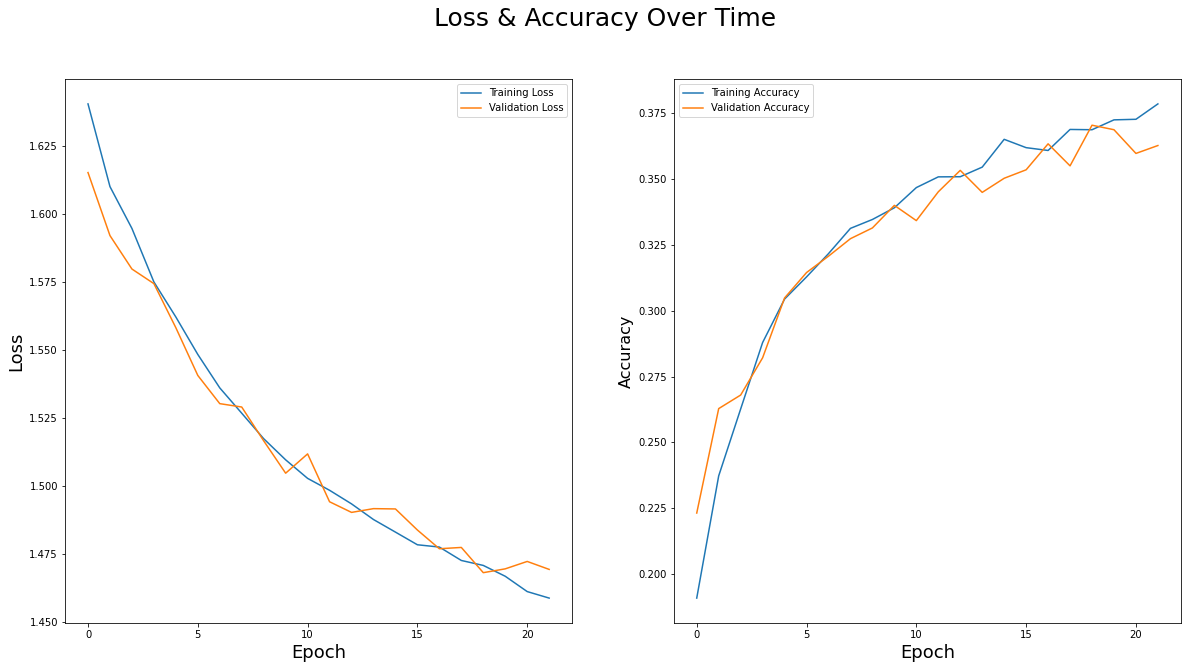

In [17]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion7.history['loss'], label='Training Loss')
plt.plot(emotion7.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion7.history['accuracy'], label='Training Accuracy')
plt.plot(emotion7.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

# model evaluation

In [18]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

92/92 [==============================] - 96s 1s/step - loss: 1.4406 - accuracy: 0.3905


# very low accuracy no need to predict the images

 # Model 8 
 # 4 convulational & 2 max pooling with 50 epochs

In [30]:
#Initialize our model
model = tf.keras.Sequential()

#Input Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling to decrease dimension
model.add(Dropout(0.25)) #test

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling to decrease dimension
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten()) #Flattens our data into a vector

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [31]:
# to use callback use this code
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', 
                                                  classes=np.unique(train.classes), 
                                                  y=train.classes)
class_weights = dict(zip(np.unique(train.classes),class_weights))

#saves our best model to this location
filepath = 'C:/Users/asmam/OneDrive/Documents/Programme/project/Model8/Model_8.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5' 

callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_delta=0.0001, verbose=1),
             tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss',verbose=1, save_best_only=True, mode='min'),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1,restore_best_weights=True)]

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
emotion8 = model.fit(train, validation_data=valid, epochs=50, callbacks=callbacks, class_weight=class_weights)

Epoch 1/50
292/292 [==============================] - ETA: 0s - loss: 1.5717 - accuracy: 0.2430
Epoch 1: val_loss improved from inf to 1.48707, saving model to C:/Users/asmam/OneDrive/Documents/Programme/project/Model8\Model_8.epoch01-loss1.49.hdf5
292/292 [==============================] - 102s 347ms/step - loss: 1.5717 - accuracy: 0.2430 - val_loss: 1.4871 - val_accuracy: 0.3701 - lr: 1.0000e-04
Epoch 2/50
292/292 [==============================] - ETA: 0s - loss: 1.4443 - accuracy: 0.3893
Epoch 2: val_loss improved from 1.48707 to 1.41654, saving model to C:/Users/asmam/OneDrive/Documents/Programme/project/Model8\Model_8.epoch02-loss1.42.hdf5
292/292 [==============================] - 74s 255ms/step - loss: 1.4443 - accuracy: 0.3893 - val_loss: 1.4165 - val_accuracy: 0.4147 - lr: 1.0000e-04
Epoch 3/50
292/292 [==============================] - ETA: 0s - loss: 1.3791 - accuracy: 0.4240
Epoch 3: val_loss improved from 1.41654 to 1.35086, saving model to C:/Users/asmam/OneDrive/Documen

292/292 [==============================] - 77s 262ms/step - loss: 0.9392 - accuracy: 0.6381 - val_loss: 0.9828 - val_accuracy: 0.6162 - lr: 1.0000e-04
Epoch 23/50
292/292 [==============================] - ETA: 0s - loss: 0.9301 - accuracy: 0.6410
Epoch 23: val_loss did not improve from 0.98285
292/292 [==============================] - 77s 262ms/step - loss: 0.9301 - accuracy: 0.6410 - val_loss: 1.0137 - val_accuracy: 0.5960 - lr: 1.0000e-04
Epoch 24/50
292/292 [==============================] - ETA: 0s - loss: 0.9135 - accuracy: 0.6494
Epoch 24: val_loss improved from 0.98285 to 0.96868, saving model to C:/Users/asmam/OneDrive/Documents/Programme/project/Model8\Model_8.epoch24-loss0.97.hdf5
292/292 [==============================] - 75s 258ms/step - loss: 0.9135 - accuracy: 0.6494 - val_loss: 0.9687 - val_accuracy: 0.6198 - lr: 1.0000e-04
Epoch 25/50
292/292 [==============================] - ETA: 0s - loss: 0.9012 - accuracy: 0.6547
Epoch 25: val_loss did not improve from 0.96868
29

In [34]:
#Saving our model/weights
model.save('emotion-detection8.h5')
model.save_weights('emotion_weight8.h5')
np.save("history", emotion8.history)
print('saved model to disk.')

saved model to disk.


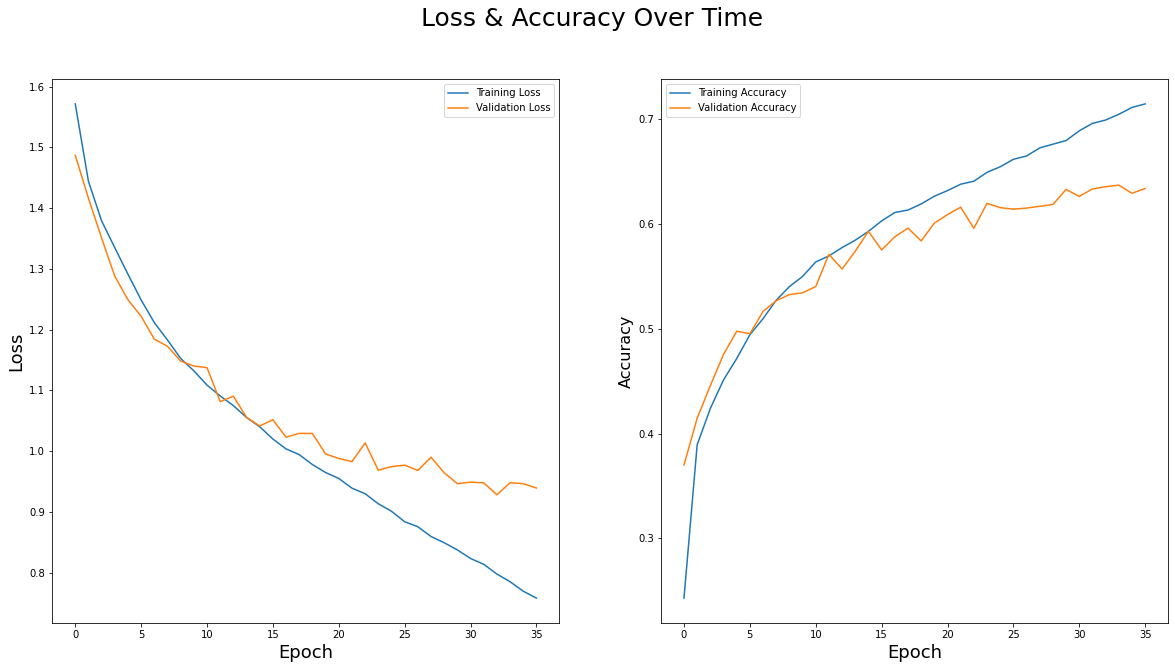

In [36]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion8.history['loss'], label='Training Loss')
plt.plot(emotion8.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion8.history['accuracy'], label='Training Accuracy')
plt.plot(emotion8.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

In [37]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

92/92 [==============================] - 6s 59ms/step - loss: 0.9129 - accuracy: 0.6471


# visualisation of results

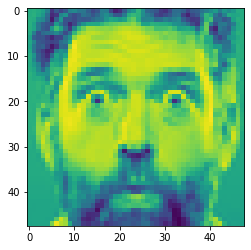

In [38]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions/Test/surprised/im30.png',
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [39]:
labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

[0.0, 0.0, 0.0, 0.0, 1.0]
{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprised': 4}


In [40]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])

Prediction: surprised


# surperised example
correct prediction

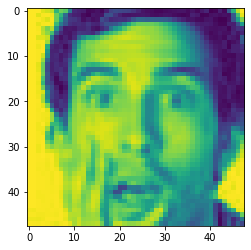

In [41]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp1_surperise.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: surprised


<BarContainer object of 5 artists>

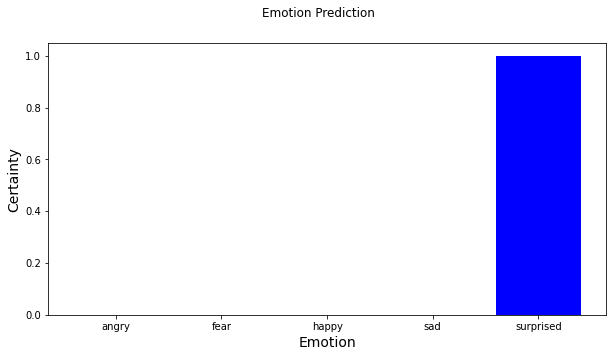

In [42]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# sad example
correct prediction

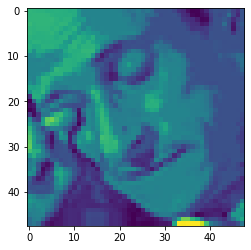

In [43]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp2_sad.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: sad


<BarContainer object of 5 artists>

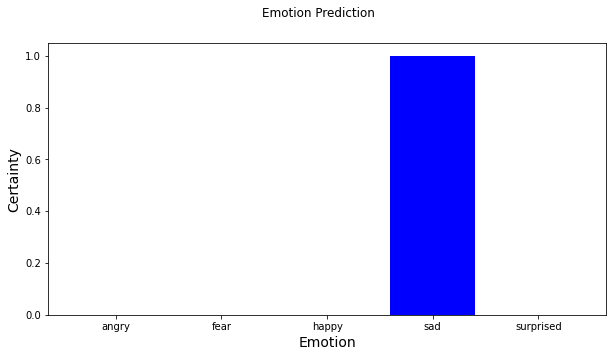

In [44]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# happy example
correct prediction

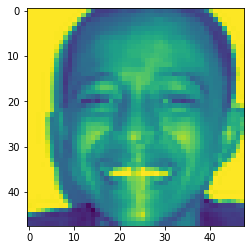

In [45]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp3_happy.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: happy


<BarContainer object of 5 artists>

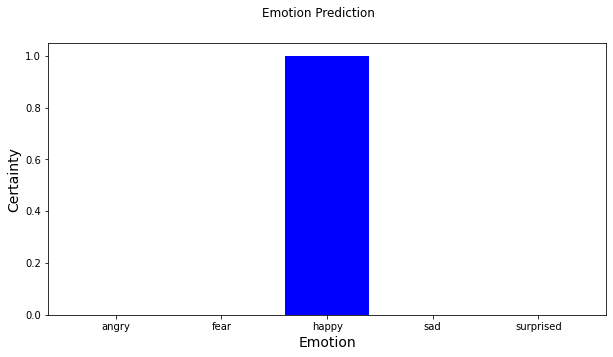

In [46]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# fear example
right prediction

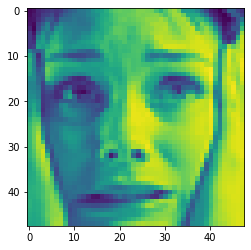

In [47]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp4_fear.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: fear


<BarContainer object of 5 artists>

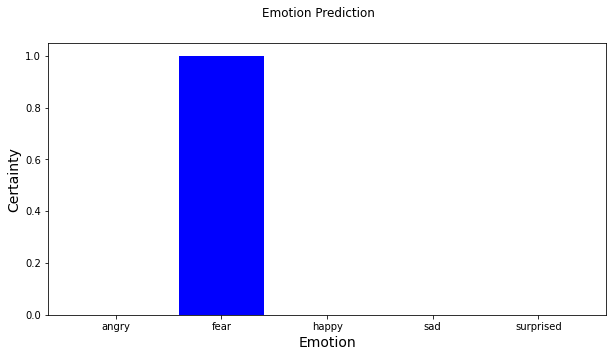

In [48]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# angry prediction
wrong prediction

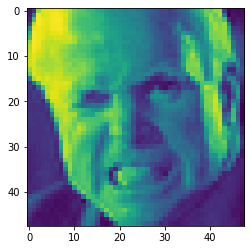

In [49]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp5_angry.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: fear


<BarContainer object of 5 artists>

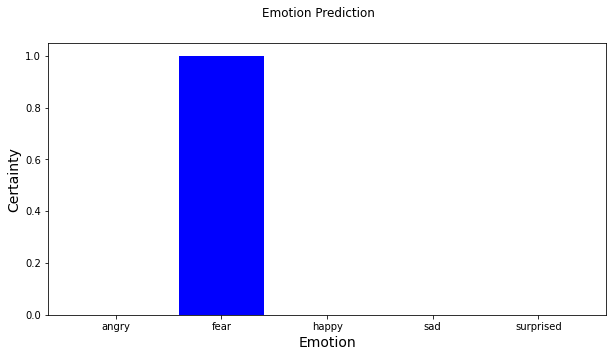

In [50]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# model 9
# 5 convo, 3 max pooling 50 epochs no pre- trained model

In [4]:
model = tf.keras.Sequential()

#Input Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) #test

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.2))

model.add(Flatten()) #Flattens our data into a vector

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
emotion9 = model.fit(train, validation_data=valid, epochs=50)

Epoch 1/50
292/292 [==============================] - 239s 814ms/step - loss: 1.5676 - accuracy: 0.3106 - val_loss: 1.5834 - val_accuracy: 0.3377
Epoch 2/50
292/292 [==============================] - 186s 636ms/step - loss: 1.4397 - accuracy: 0.3922 - val_loss: 1.4356 - val_accuracy: 0.4284
Epoch 3/50
292/292 [==============================] - 187s 640ms/step - loss: 1.3485 - accuracy: 0.4369 - val_loss: 1.3018 - val_accuracy: 0.4654
Epoch 4/50
292/292 [==============================] - 185s 633ms/step - loss: 1.2855 - accuracy: 0.4677 - val_loss: 1.2343 - val_accuracy: 0.4997
Epoch 5/50
292/292 [==============================] - 183s 628ms/step - loss: 1.2150 - accuracy: 0.5007 - val_loss: 1.1675 - val_accuracy: 0.5224
Epoch 6/50
292/292 [==============================] - 183s 628ms/step - loss: 1.1605 - accuracy: 0.5267 - val_loss: 1.1538 - val_accuracy: 0.5276
Epoch 7/50
292/292 [==============================] - 183s 628ms/step - loss: 1.1145 - accuracy: 0.5470 - val_loss: 1.0858 -

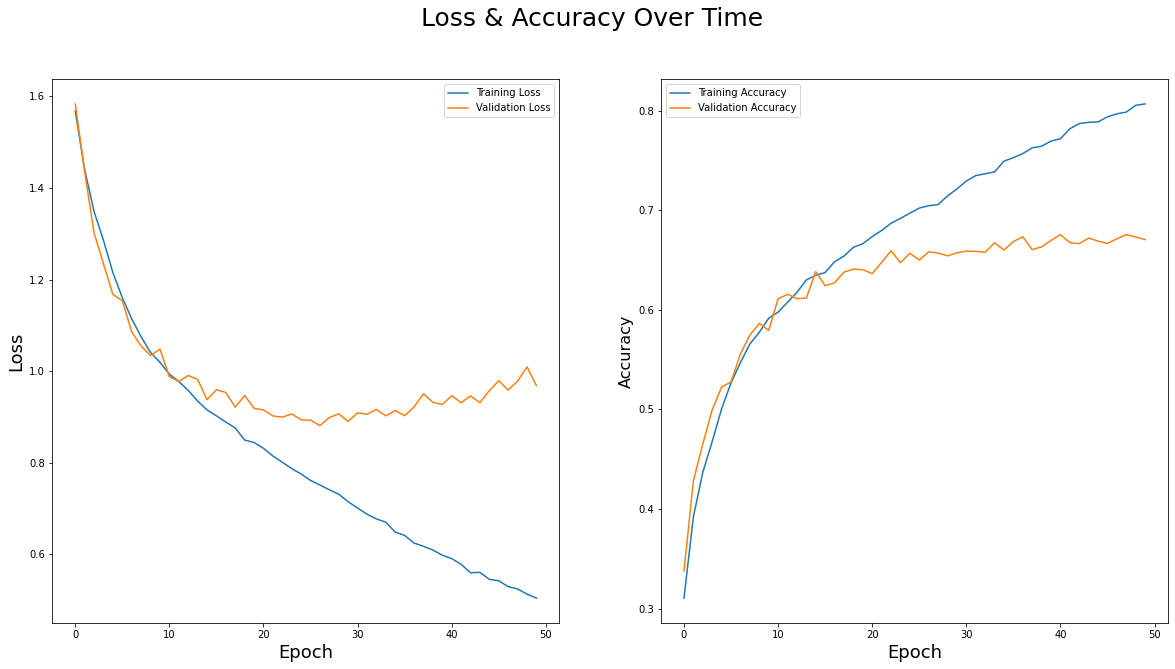

In [7]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion9.history['loss'], label='Training Loss')
plt.plot(emotion9.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion9.history['accuracy'], label='Training Accuracy')
plt.plot(emotion9.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

# model evaluation

In [8]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

92/92 [==============================] - 32s 345ms/step - loss: 0.9277 - accuracy: 0.6978


# # visualisation of results

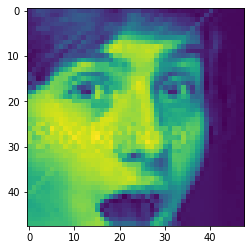

In [14]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions/Test/surprised/im33.png',
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [15]:
labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

[0.0, 0.0, 0.0, 0.0, 1.0]
{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprised': 4}


In [16]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])

Prediction: surprised


# surperised example
wrong prediction

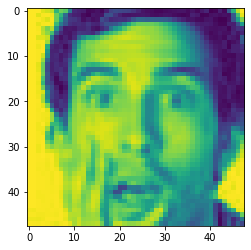

In [19]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp1_surperise.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: fear


<BarContainer object of 5 artists>

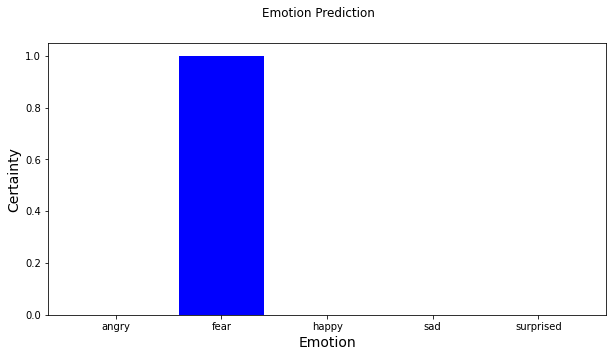

In [20]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# sad example
right prediction

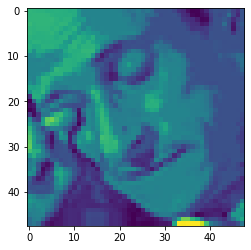

In [21]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp2_sad.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: sad


<BarContainer object of 5 artists>

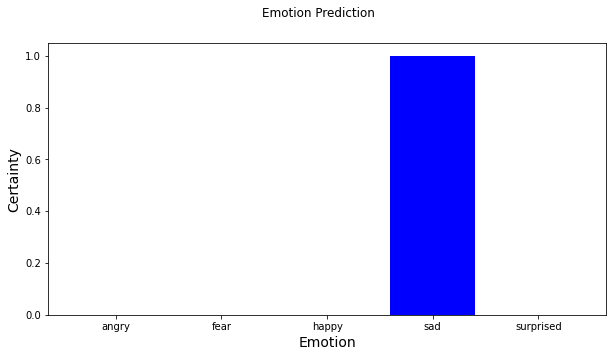

In [22]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# happy example
right prediction

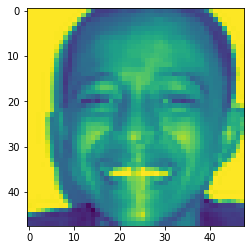

In [23]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp3_happy.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: happy


<BarContainer object of 5 artists>

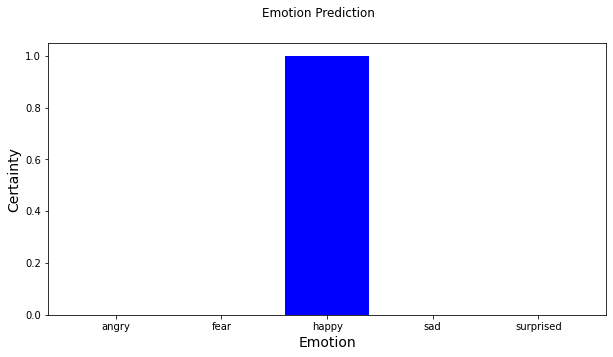

In [24]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# fear example
right prediction

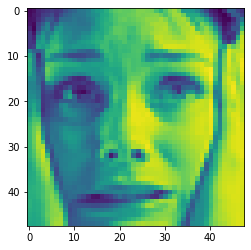

In [26]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp4_fear.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: fear


<BarContainer object of 5 artists>

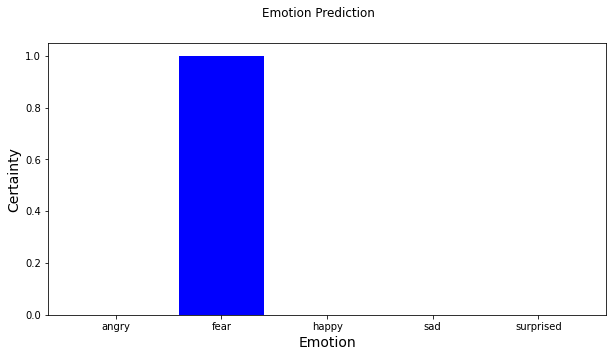

In [27]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# angry example
right prediction

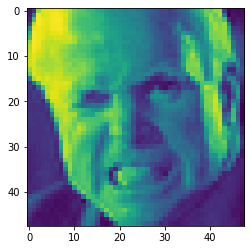

In [28]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp5_angry.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

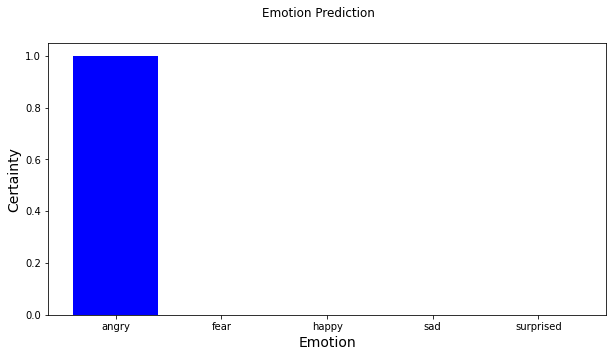

In [29]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# model 10
# 7 convo, 3 max pooling 50 epochs no pre- trained model


In [36]:
model = tf.keras.Sequential()

#Input Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) #test

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten()) #Flattens our data into a vector

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_46 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 23, 23, 64)        0         
                                                                 
 conv2d_47 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                 

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
emotion10 = model.fit(train, validation_data=valid, epochs=50)

Epoch 1/50
292/292 [==============================] - 178s 605ms/step - loss: 1.5634 - accuracy: 0.2961 - val_loss: 1.5742 - val_accuracy: 0.3096
Epoch 2/50
292/292 [==============================] - 197s 674ms/step - loss: 1.5302 - accuracy: 0.3191 - val_loss: 1.5291 - val_accuracy: 0.3328
Epoch 3/50
292/292 [==============================] - 203s 695ms/step - loss: 1.4133 - accuracy: 0.3985 - val_loss: 1.4014 - val_accuracy: 0.4113
Epoch 4/50
292/292 [==============================] - 202s 693ms/step - loss: 1.3313 - accuracy: 0.4482 - val_loss: 1.2694 - val_accuracy: 0.4748
Epoch 5/50
292/292 [==============================] - 203s 694ms/step - loss: 1.2672 - accuracy: 0.4743 - val_loss: 1.2513 - val_accuracy: 0.4851
Epoch 6/50
292/292 [==============================] - 204s 697ms/step - loss: 1.2164 - accuracy: 0.4979 - val_loss: 1.1602 - val_accuracy: 0.5284
Epoch 7/50
292/292 [==============================] - 202s 692ms/step - loss: 1.1723 - accuracy: 0.5199 - val_loss: 1.1703 -

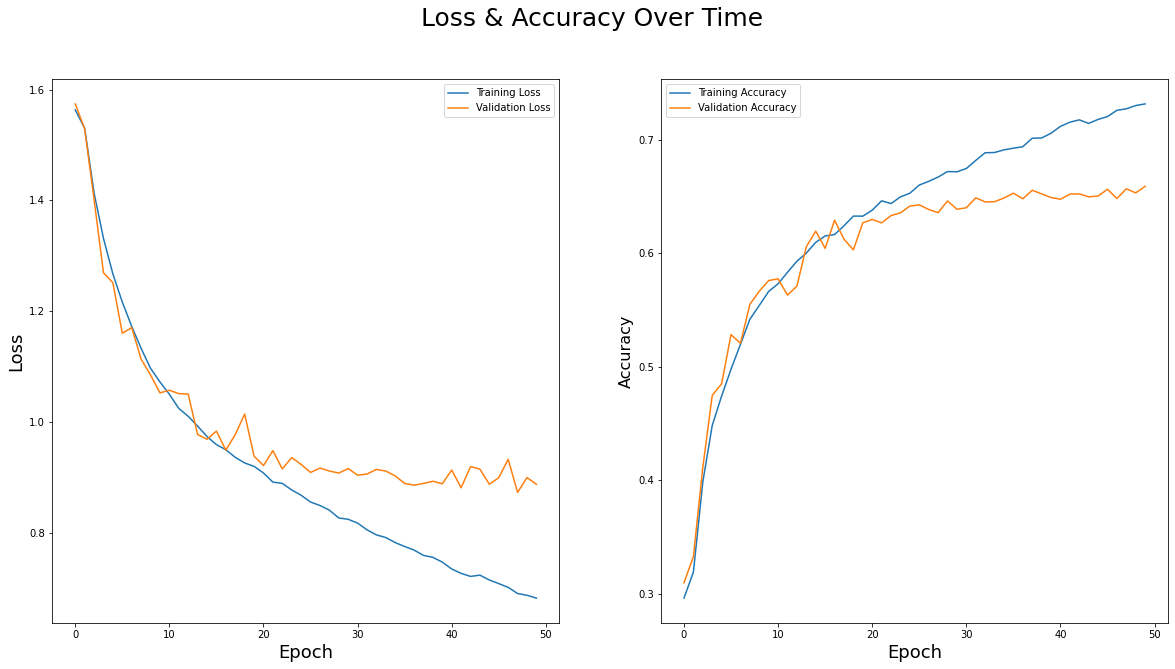

In [39]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion10.history['loss'], label='Training Loss')
plt.plot(emotion10.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion10.history['accuracy'], label='Training Accuracy')
plt.plot(emotion10.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

In [40]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

92/92 [==============================] - 6s 59ms/step - loss: 0.8376 - accuracy: 0.6892


# visualisation of results

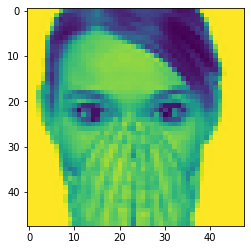

In [43]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions/Test/surprised/im39.png',
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [44]:
labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

[0.0, 0.0, 2.0792486e-29, 0.0, 1.0]
{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprised': 4}


In [45]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])

Prediction: surprised


# surperised example
right prediction

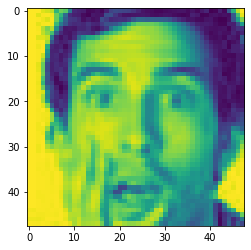

In [46]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp1_surperise.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: surprised


<BarContainer object of 5 artists>

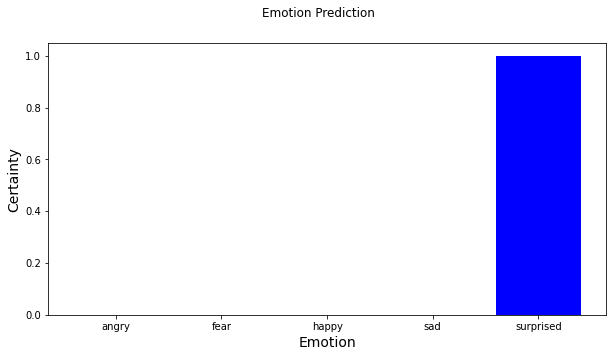

In [47]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# sad example
right prediction

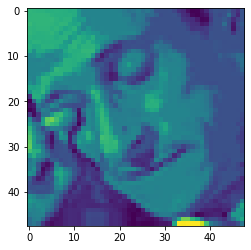

In [48]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp2_sad.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: sad


<BarContainer object of 5 artists>

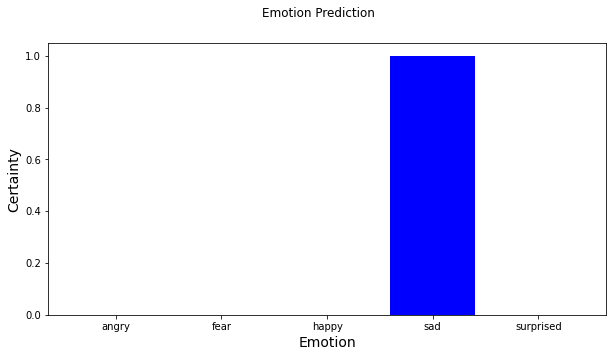

In [49]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# happy example
right prediction

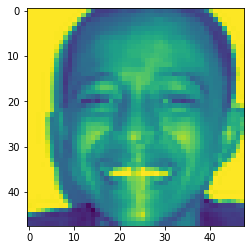

In [50]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp3_happy.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: happy


<BarContainer object of 5 artists>

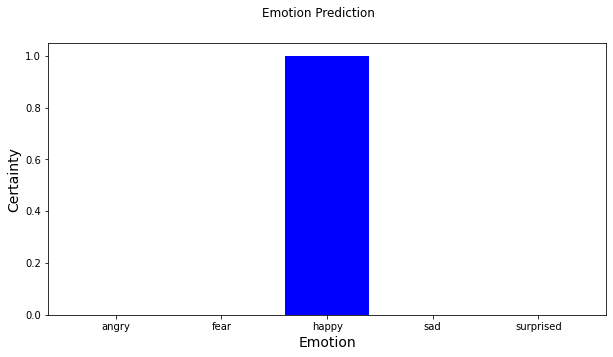

In [51]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# fear example
right prediction

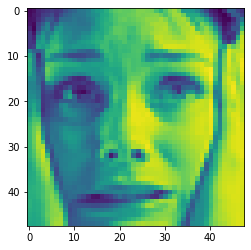

In [52]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp4_fear.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: fear


<BarContainer object of 5 artists>

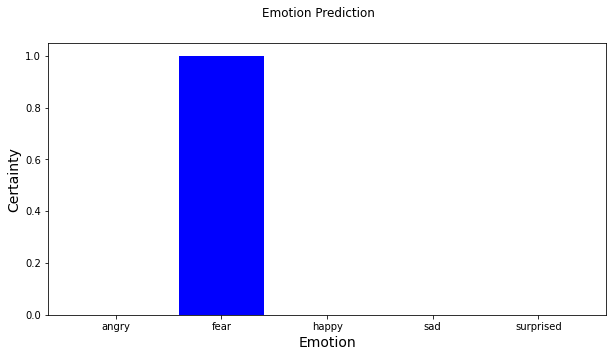

In [53]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# angry prediction
right prediction

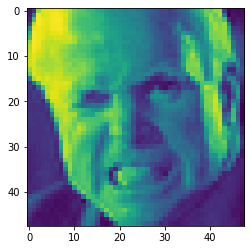

In [55]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp5_angry.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: angry


<BarContainer object of 5 artists>

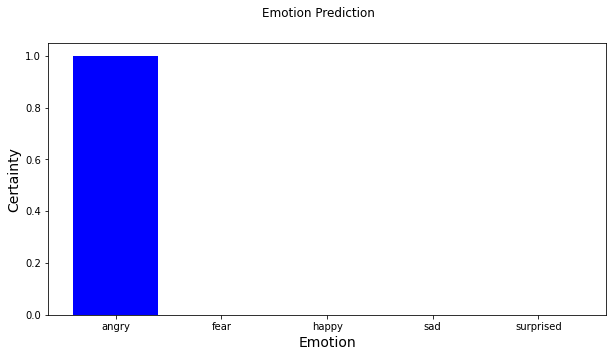

In [56]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# fear testing fro random pic from internet
right prediction

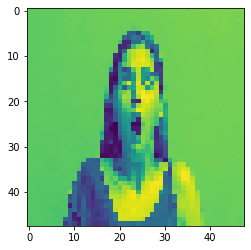

In [59]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp9_fear.jpg', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: fear


<BarContainer object of 5 artists>

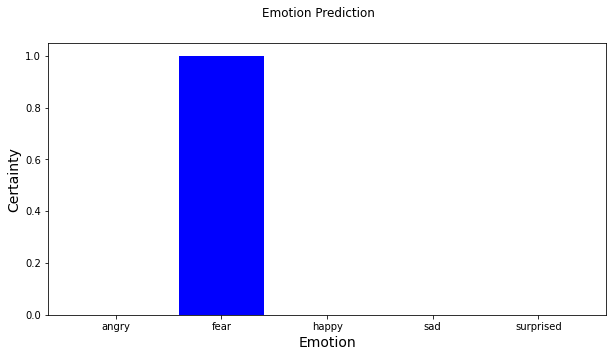

In [60]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# happy testing for random pic from internet
right prediction

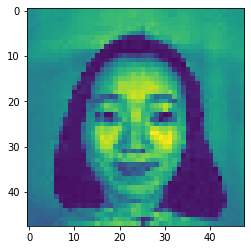

In [62]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp7_happy.jpg', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: happy


<BarContainer object of 5 artists>

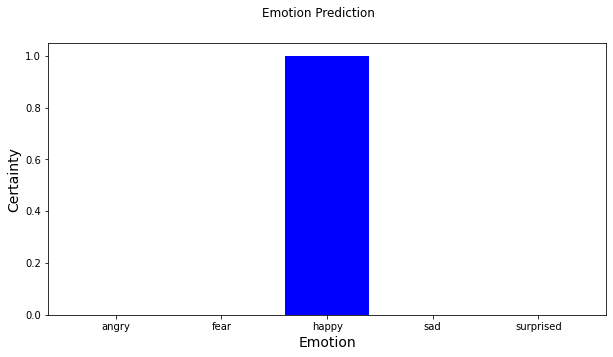

In [63]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# surpersied testing for random pic from internet
wrong prediction

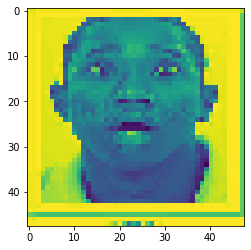

In [67]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp10_surpersied.jpg', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: fear


<BarContainer object of 5 artists>

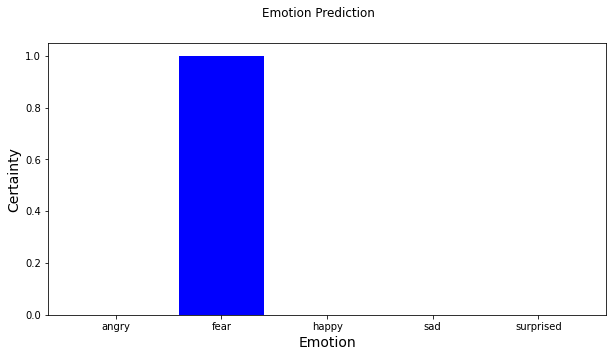

In [68]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# angry example
wrong prediction

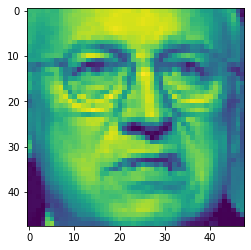

In [69]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp11_angry.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: fear


<BarContainer object of 5 artists>

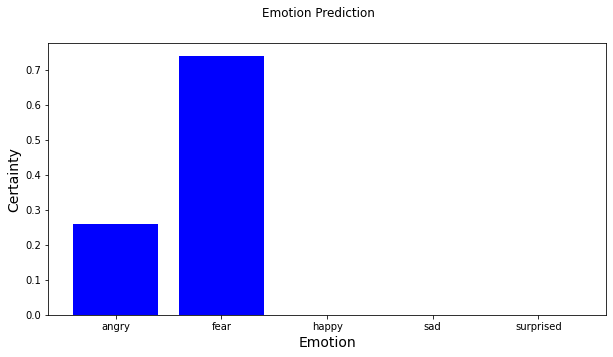

In [70]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

# sad example
wrong prediction
# 70% accuracy in predictions for model 10 too. 7/10, 4/5 for model 9 that makes about 70% accuracy too


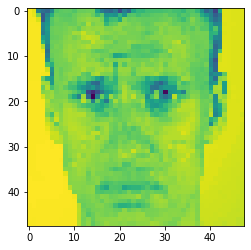

In [71]:
img = image.load_img('C:/Users/asmam/OneDrive/Documents/Programme/Appiled AI/Project/Emotions2/exp12_sad.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

Prediction: surprised


<BarContainer object of 5 artists>

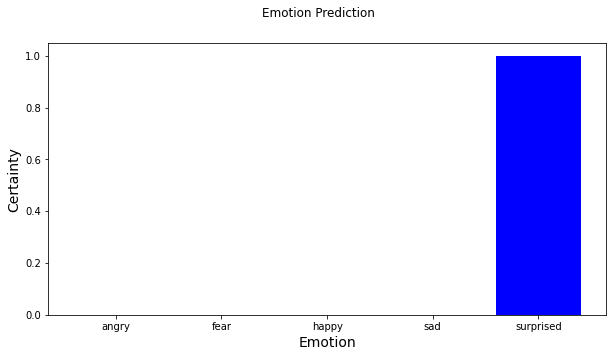

In [72]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')